In [2]:
import yt
import numpy as np
from IPython.core.display import Image
from yt.visualization.volume_rendering.transfer_function_helper import TransferFunctionHelper
from yt.visualization.volume_rendering.render_source import VolumeSource
from yt import derived_field



#import matplotlib
#matplotlib.use('agg')
import sys
import csv
from yt.units import dimensions
import yt.visualization.volume_rendering.api as vr
from yt.visualization.volume_rendering.transfer_function_helper import \
    TransferFunctionHelper
from yt.visualization.volume_rendering.api import Scene, VolumeSource, \
    Camera, ColorTransferFunction
from IPython.display import Image, display
import argparse

In [3]:
#Where 3 and 4 correspond to 4 level / 3 level resolution
ds3 = yt.load('/home/cdegrendele/summer2018/MAESTRO-master/Util/postprocessing/urca-tools/wd_3lev_Tc5-5e8_rhoc4-5e9_plt03971')
ds4 = yt.load('/home/cdegrendele/summer2018/MAESTRO-master/Util/postprocessing/urca-tools/wd_4lev_Tc5-5e8_rhoc4-5e9_plt06605')

yt : [INFO     ] 2018-06-22 13:15:08,577 Parameters: current_time              = 445.0462878317719
yt : [INFO     ] 2018-06-22 13:15:08,578 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-06-22 13:15:08,579 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2018-06-22 13:15:08,580 Parameters: domain_right_edge         = [5.12e+08 5.12e+08 5.12e+08]
yt : [INFO     ] 2018-06-22 13:15:08,596 Parameters: current_time              = 443.91965665780566
yt : [INFO     ] 2018-06-22 13:15:08,597 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-06-22 13:15:08,598 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2018-06-22 13:15:08,598 Parameters: domain_right_edge         = [5.12e+08 5.12e+08 5.12e+08]


In [4]:
#Find Middle
value,location = ds4.find_max('density')
value,location = ds3.find_max('density')

yt : [INFO     ] 2018-06-22 13:15:25,955 Max Value is 4.49861e+09 at 255875000.0000000000000000 256125000.0000000000000000 255875000.0000000000000000
yt : [INFO     ] 2018-06-22 13:15:36,387 Max Value is 4.49806e+09 at 255750000.0000000000000000 256250000.0000000000000000 255750000.0000000000000000


yt : [INFO     ] 2018-06-20 14:55:33,613 Rendering scene (Can take a while).
yt : [INFO     ] 2018-06-20 14:55:33,626 Creating volume
/home/cdegrendele/yt-conda/lib/python3.6/site-packages/yt/units/yt_array.py:1293: RuntimeWarning: invalid value encountered in log10
  out_arr = func(np.asarray(inp), out=out, **kwargs)
yt : [INFO     ] 2018-06-20 14:56:14,362 Rendering scene (Can take a while).
yt : [INFO     ] 2018-06-20 14:56:33,296 Saving render radial_velocity4.png


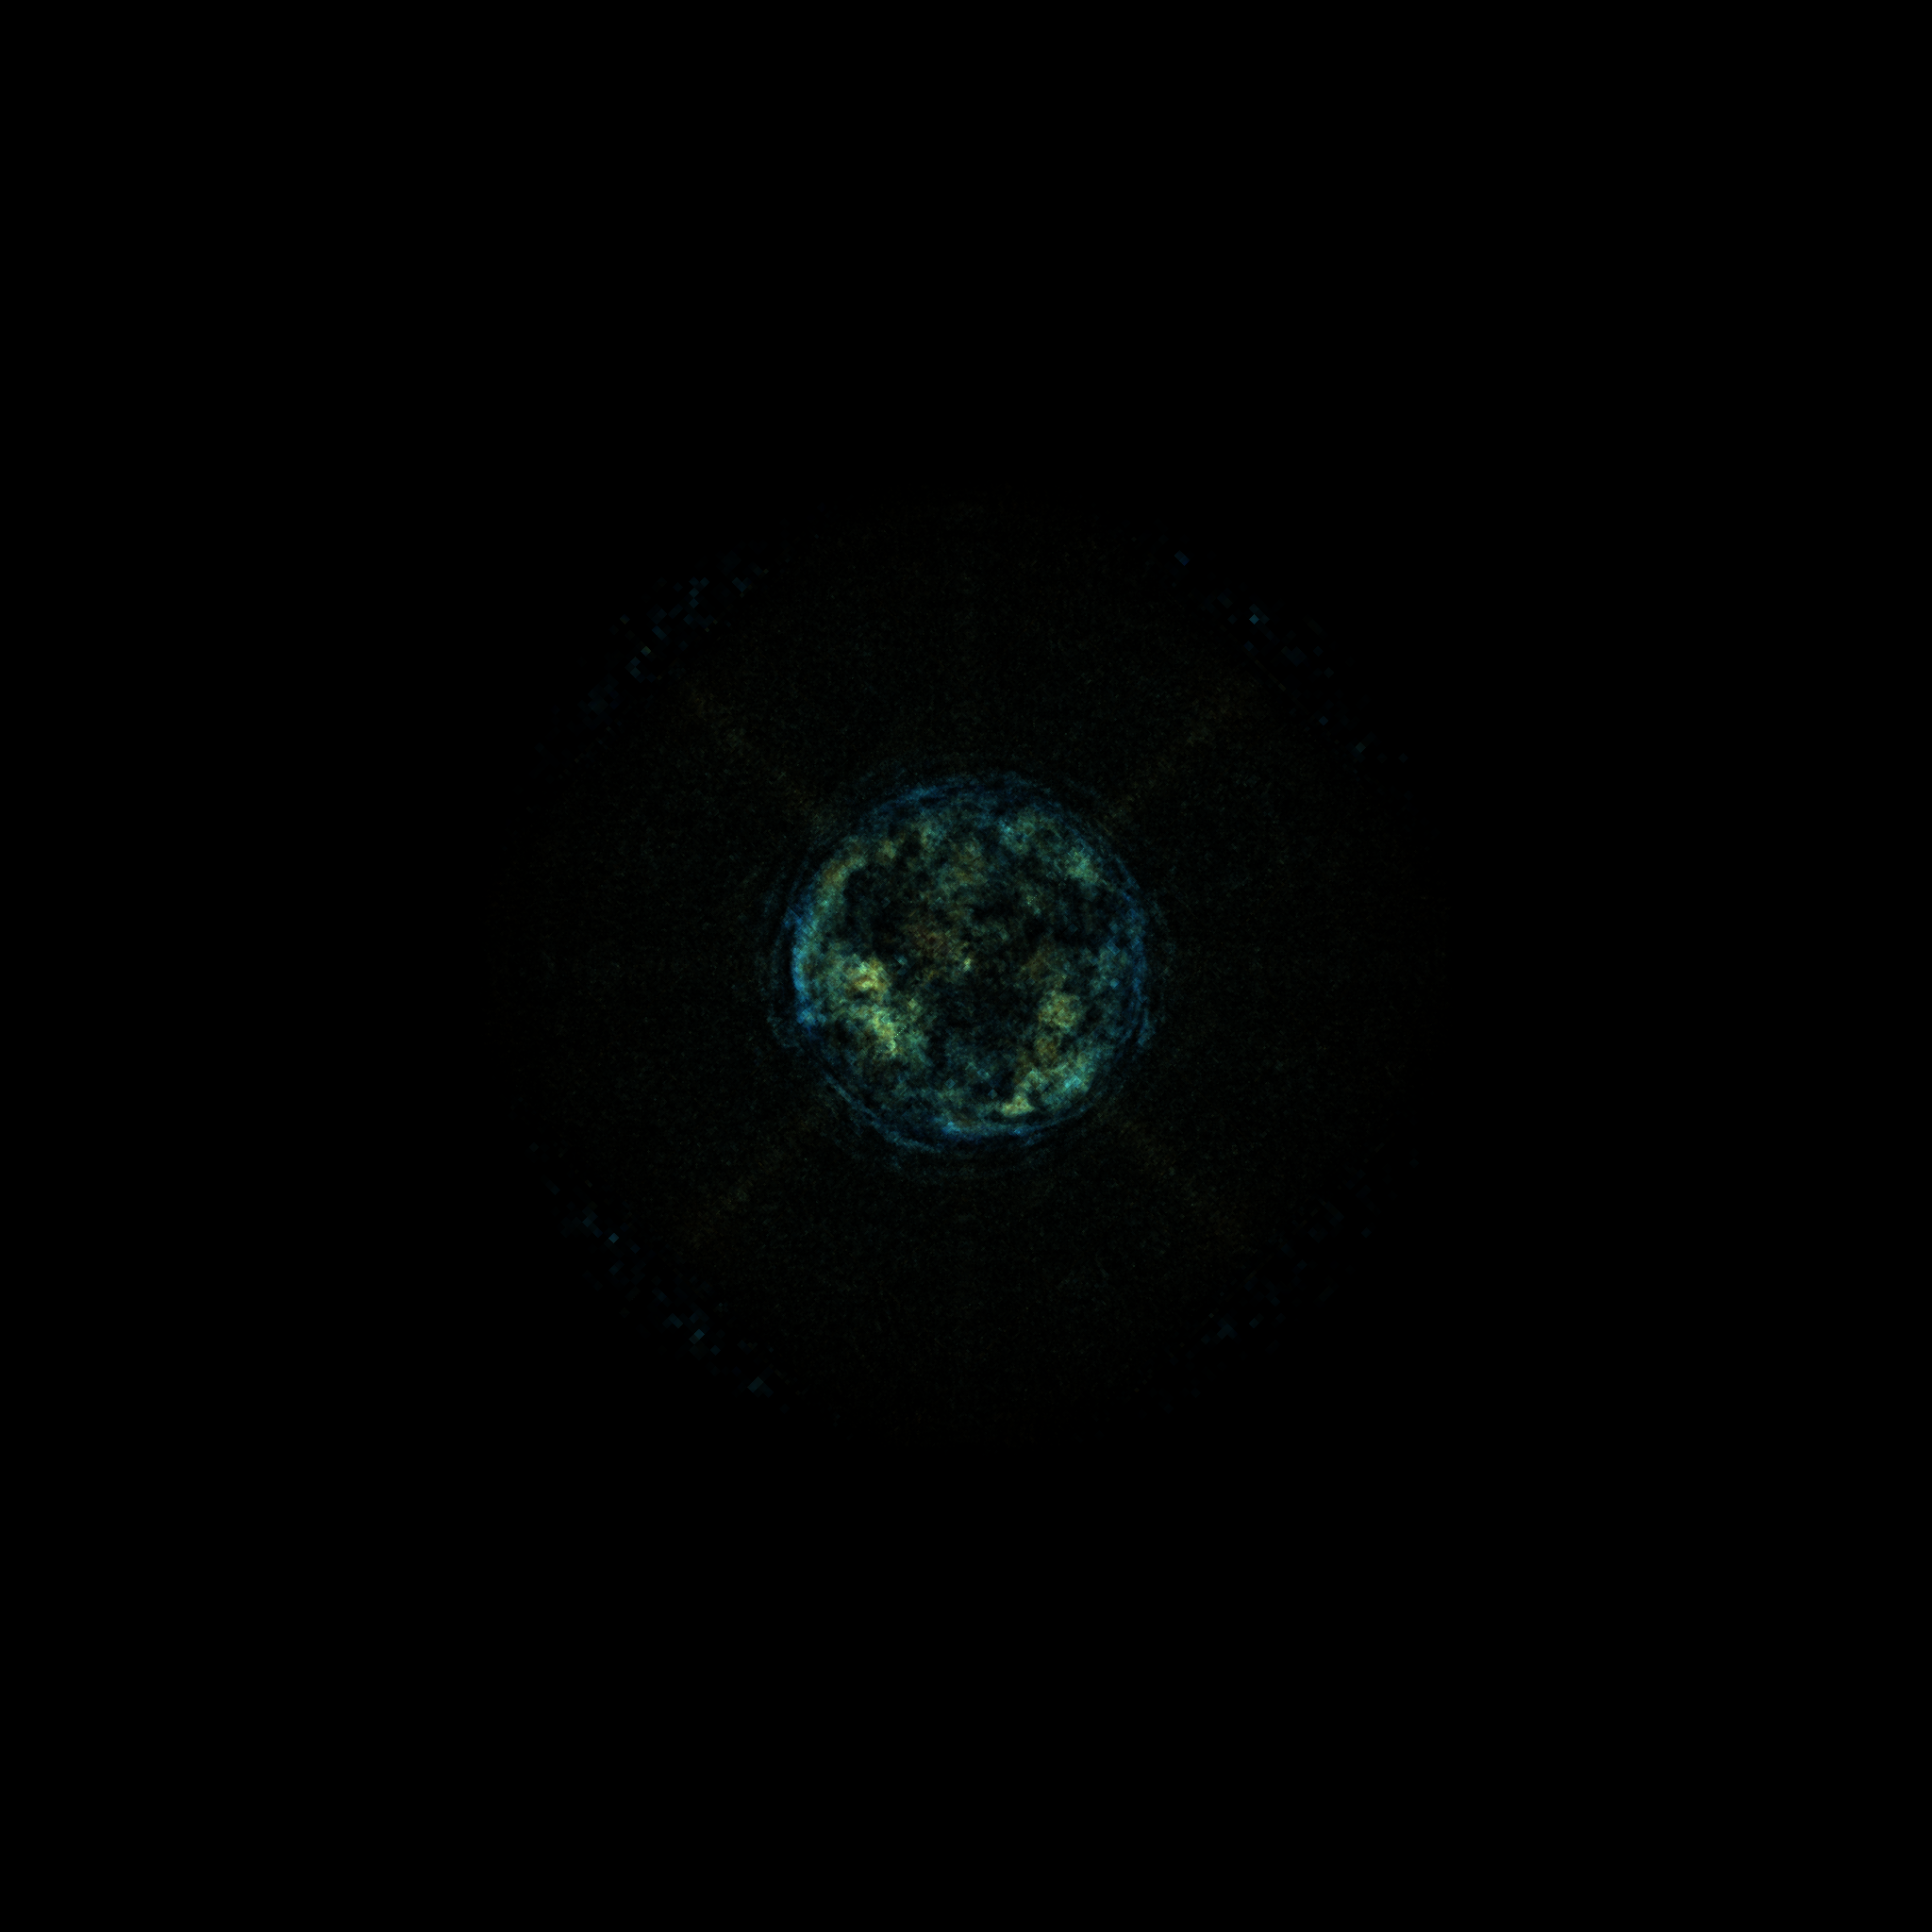

In [6]:
# Radial Velocity Slice of 4 level simulation

slice = ds4.r[:(255875000, 'cm'), :, :]
sc = Scene()
so = VolumeSource(slice,'radial_velocity')

bounds = np.array([3*1.0e3, 3.0e6])
sigma  = 0.4


tfh = TransferFunctionHelper(ds4)
tfh.set_field('radial_velocity')
tfh.set_log(True)
tfh.grey_opacity = True
tfh.set_bounds(bounds)
tfh.build_transfer_function()
nlayers = 7
tfh.tf.add_layers(nlayers, colormap='Blue-Red', w=sigma**2)
tfh.plot(profile_field='radial_velocity')
so.transfer_function = tfh.tf

sc.add_source(so)

sc.add_camera()
sc.camera.focus = ds4.domain_center
sc.camera.resolution = 2048
#sc.camera.north_vector = [0,0,1]

sc.camera.position = ds4.domain_center + [1.0, 0.0, 0.0] * ds4.domain_width * 1.0e8/5.12e8


sc.render()
sc.save('radial_velocity4.png')

Image(filename='radial_velocity4.png')

In [34]:
#Slice plot attempt.. again...

from yt.mods import SlicePlot
slc = SlicePlot(ds4,"x", "radial_velocity")
slc.set_cmap(field="radial_velocity", cmap='RdBu')
slc.annotate_sphere([255875000, 256125000, 255875000], radius =(400, 'km'),
                    circle_args={'color':'black'} )
slc.annotate_scale(  plot_args={'color':'black'}  )
slc.save("f_radvelocity_lvl4.png")
Image(filename='f_radvelocity_lvl4.png')

yt : [INFO     ] 2018-06-22 12:23:25,421 xlim = 0.000000 512000000.000000
yt : [INFO     ] 2018-06-22 12:23:25,422 ylim = 0.000000 512000000.000000
yt : [INFO     ] 2018-06-22 12:23:25,423 xlim = 0.000000 512000000.000000
yt : [INFO     ] 2018-06-22 12:23:25,424 ylim = 0.000000 512000000.000000
yt : [INFO     ] 2018-06-22 12:23:25,427 Making a fixed resolution buffer of (('gas', 'radial_velocity')) 800 by 800
yt : [WARNING  ] 2018-06-22 12:23:25,701 Plot image for field ('gas', 'radial_velocity') has both positive and negative values. Min = -1895207.371582, Max = 1888689.945312.
yt : [WARNING  ] 2018-06-22 12:23:25,703 Switching to symlog colorbar scaling unless linear scaling is specified later


TypeError: __init__() got an unexpected keyword argument 'plot_args'

yt : [INFO     ] 2018-06-20 15:05:43,694 xlim = 0.000000 512000000.000000
yt : [INFO     ] 2018-06-20 15:05:43,695 ylim = 0.000000 512000000.000000
yt : [INFO     ] 2018-06-20 15:05:43,698 xlim = 0.000000 512000000.000000
yt : [INFO     ] 2018-06-20 15:05:43,699 ylim = 0.000000 512000000.000000
yt : [INFO     ] 2018-06-20 15:05:43,701 Making a fixed resolution buffer of (('gas', 'radial_velocity')) 800 by 800
yt : [WARNING  ] 2018-06-20 15:05:43,895 Plot image for field ('gas', 'radial_velocity') has both positive and negative values. Min = -2212521.965576, Max = 2874756.023438.
yt : [WARNING  ] 2018-06-20 15:05:43,896 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2018-06-20 15:05:44,181 Saving plot f_radvelocity_lvl3.png


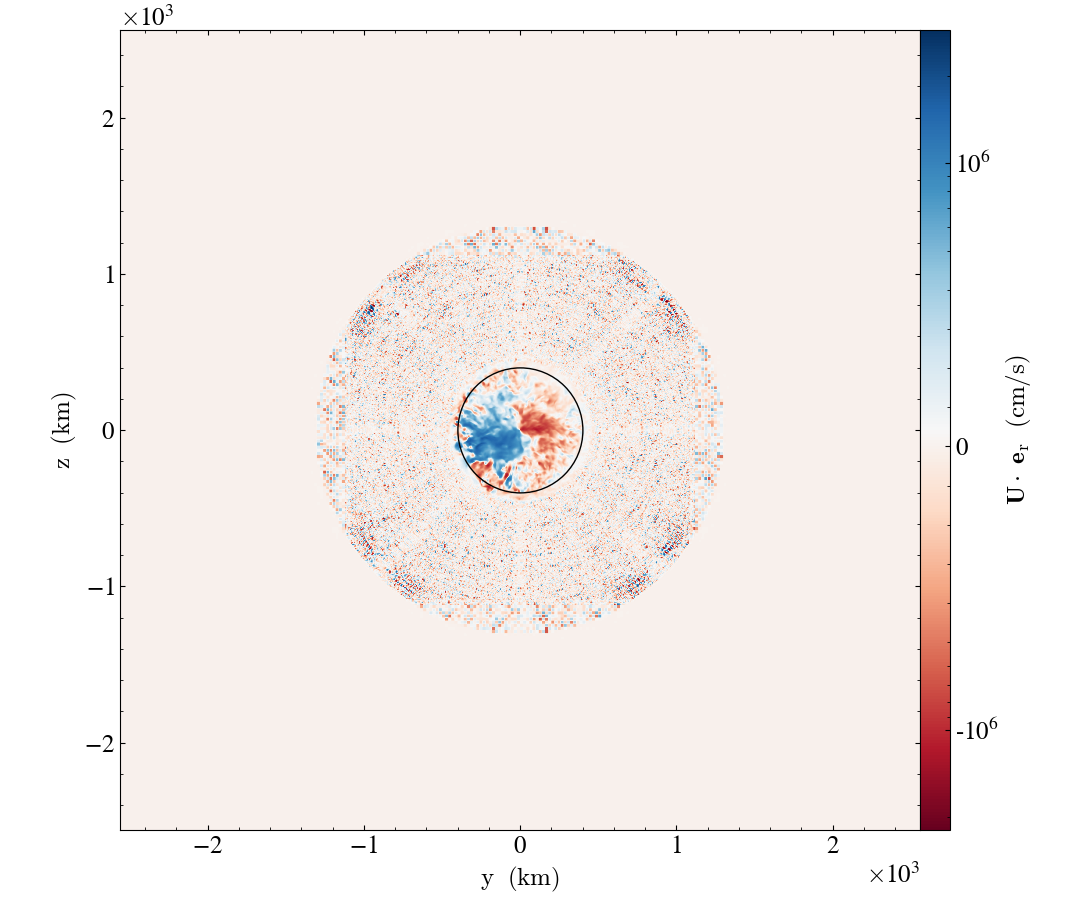

In [12]:
from yt.mods import SlicePlot
slc = SlicePlot(ds3,"x", "radial_velocity")
slc.set_cmap(field="radial_velocity", cmap='RdBu')
slc.annotate_sphere([2255750000, 256250000, 255750000], radius =(400, 'km'),
                    circle_args={'color':'black'} )
slc.save("f_radvelocity_lvl3.png")
Image(filename='f_radvelocity_lvl3.png')

In [14]:
#Radial Velocity Slice of 3 level simulation

slice = ds3.r[:(255750000, 'cm'), :, :]
sc = Scene()
so = VolumeSource(slice,'radial_velocity')

bounds = np.array([3e3, 3.0e6])
sigma  = 0.04


tfh = TransferFunctionHelper(ds4)
tfh.set_field('radial_velocity')
tfh.set_log(True)
tfh.grey_opacity = True 
tfh.set_bounds(bounds)
tfh.build_transfer_function()
nlayers = 7
tfh.tf.add_layers(nlayers, colormap='Blue-Red', w=sigma**2)
tfh.plot(profile_field='radial_velocity')
so.transfer_function = tfh.tf

sc.add_source(so)

sc.add_camera()
sc.camera.focus = ds3.domain_center
sc.camera.resolution = 2048
#sc.camera.north_vector = [0,0,1]

sc.camera.position = ds3.domain_center + [1.0, 0.0, 0.0] * ds3.domain_width * 1.0e8/5.12e8

sc.render()
sc.save('radial_velocity3.png')

yt : [INFO     ] 2018-06-20 15:13:53,285 Rendering scene (Can take a while).
yt : [INFO     ] 2018-06-20 15:13:53,294 Creating volume
yt : [INFO     ] 2018-06-20 15:14:17,063 Rendering scene (Can take a while).
yt : [INFO     ] 2018-06-20 15:14:32,059 Saving render radial_velocity3.png


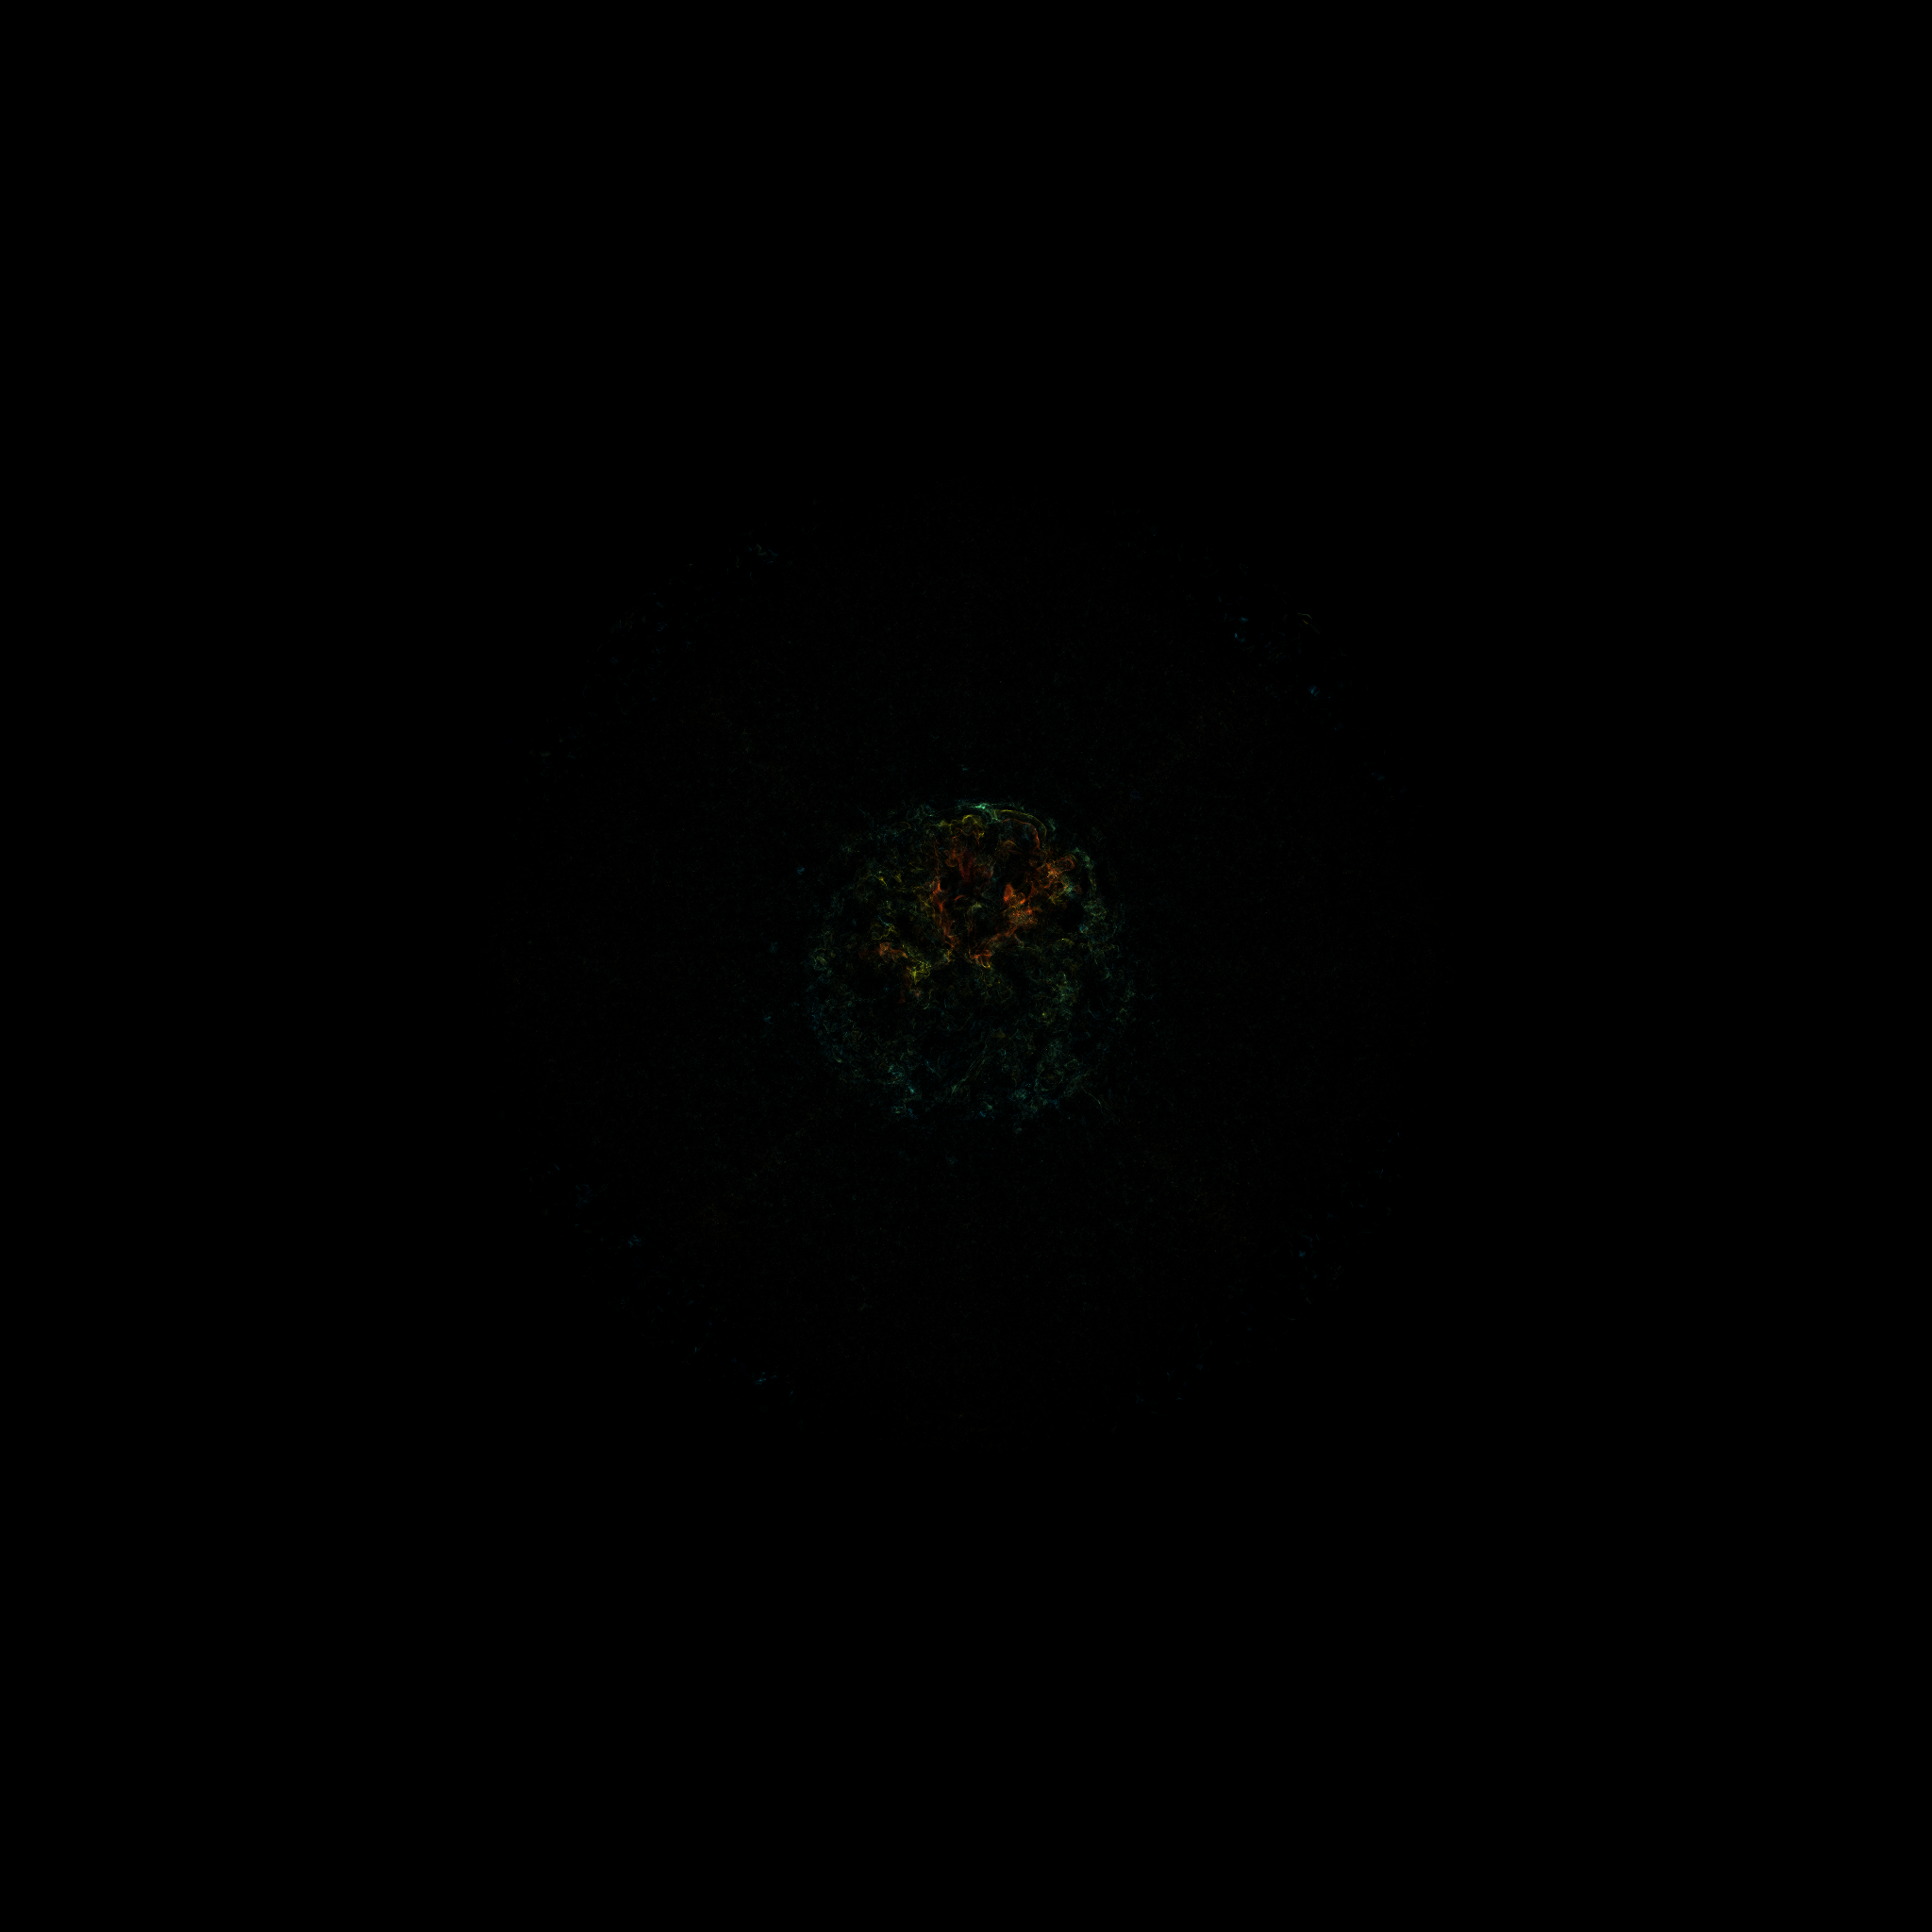

In [15]:
Image(filename='radial_velocity3.png')

In [18]:
#Energy generation for level 3
import yt



slice = ds3.r[:,:(256250000, 'cm'),:]
sc = Scene()
so = VolumeSource(slice,'enucdot')

bounds = np.array([1.0e9, 1.5e12])
sigma  = 0.04


tfh = TransferFunctionHelper(ds3)
tfh.set_field('enucdot')
tfh.set_log(True)
tfh.grey_opacity = True
tfh.set_bounds(bounds)
tfh.build_transfer_function()
nlayers = 7
tfh.tf.add_layers(nlayers, colormap='Blue-Red', w=sigma**2)
tfh.plot(profile_field='enucdot')
so.transfer_function = tfh.tf

sc.add_source(so)

sc.add_camera()
sc.camera.focus = ds3.domain_center
sc.camera.resolution = 2048
sc.camera.zoom(6)
sc.camera.position = ds3.domain_center + [0.0, 1.0 , 0.0] * ds3.domain_width * 1.0e8/5.12e8

#sc.camera.north_vector = [1,1,0]


#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


#sc.annotate_axes(alpha=.02)
#sc.annotate_domain(ds3, color=[1, 1, 1, .01])


#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@




sc.render()
sc.save('f_enucdot_lvl3.png')
#sc.save_annotated("f_enucdot_lvl3.png", sigma_clip=6)

yt : [INFO     ] 2018-06-22 11:18:27,559 Rendering scene (Can take a while).
yt : [INFO     ] 2018-06-22 11:18:27,582 Creating volume
/home/cdegrendele/yt-conda/lib/python3.6/site-packages/yt/units/yt_array.py:1293: RuntimeWarning: divide by zero encountered in log10
  out_arr = func(np.asarray(inp), out=out, **kwargs)
/home/cdegrendele/yt-conda/lib/python3.6/site-packages/yt/units/yt_array.py:1293: RuntimeWarning: invalid value encountered in log10
  out_arr = func(np.asarray(inp), out=out, **kwargs)
yt : [INFO     ] 2018-06-22 11:19:01,364 Rendering scene (Can take a while).
yt : [INFO     ] 2018-06-22 11:19:26,133 Saving render f_enucdot_lvl3.png


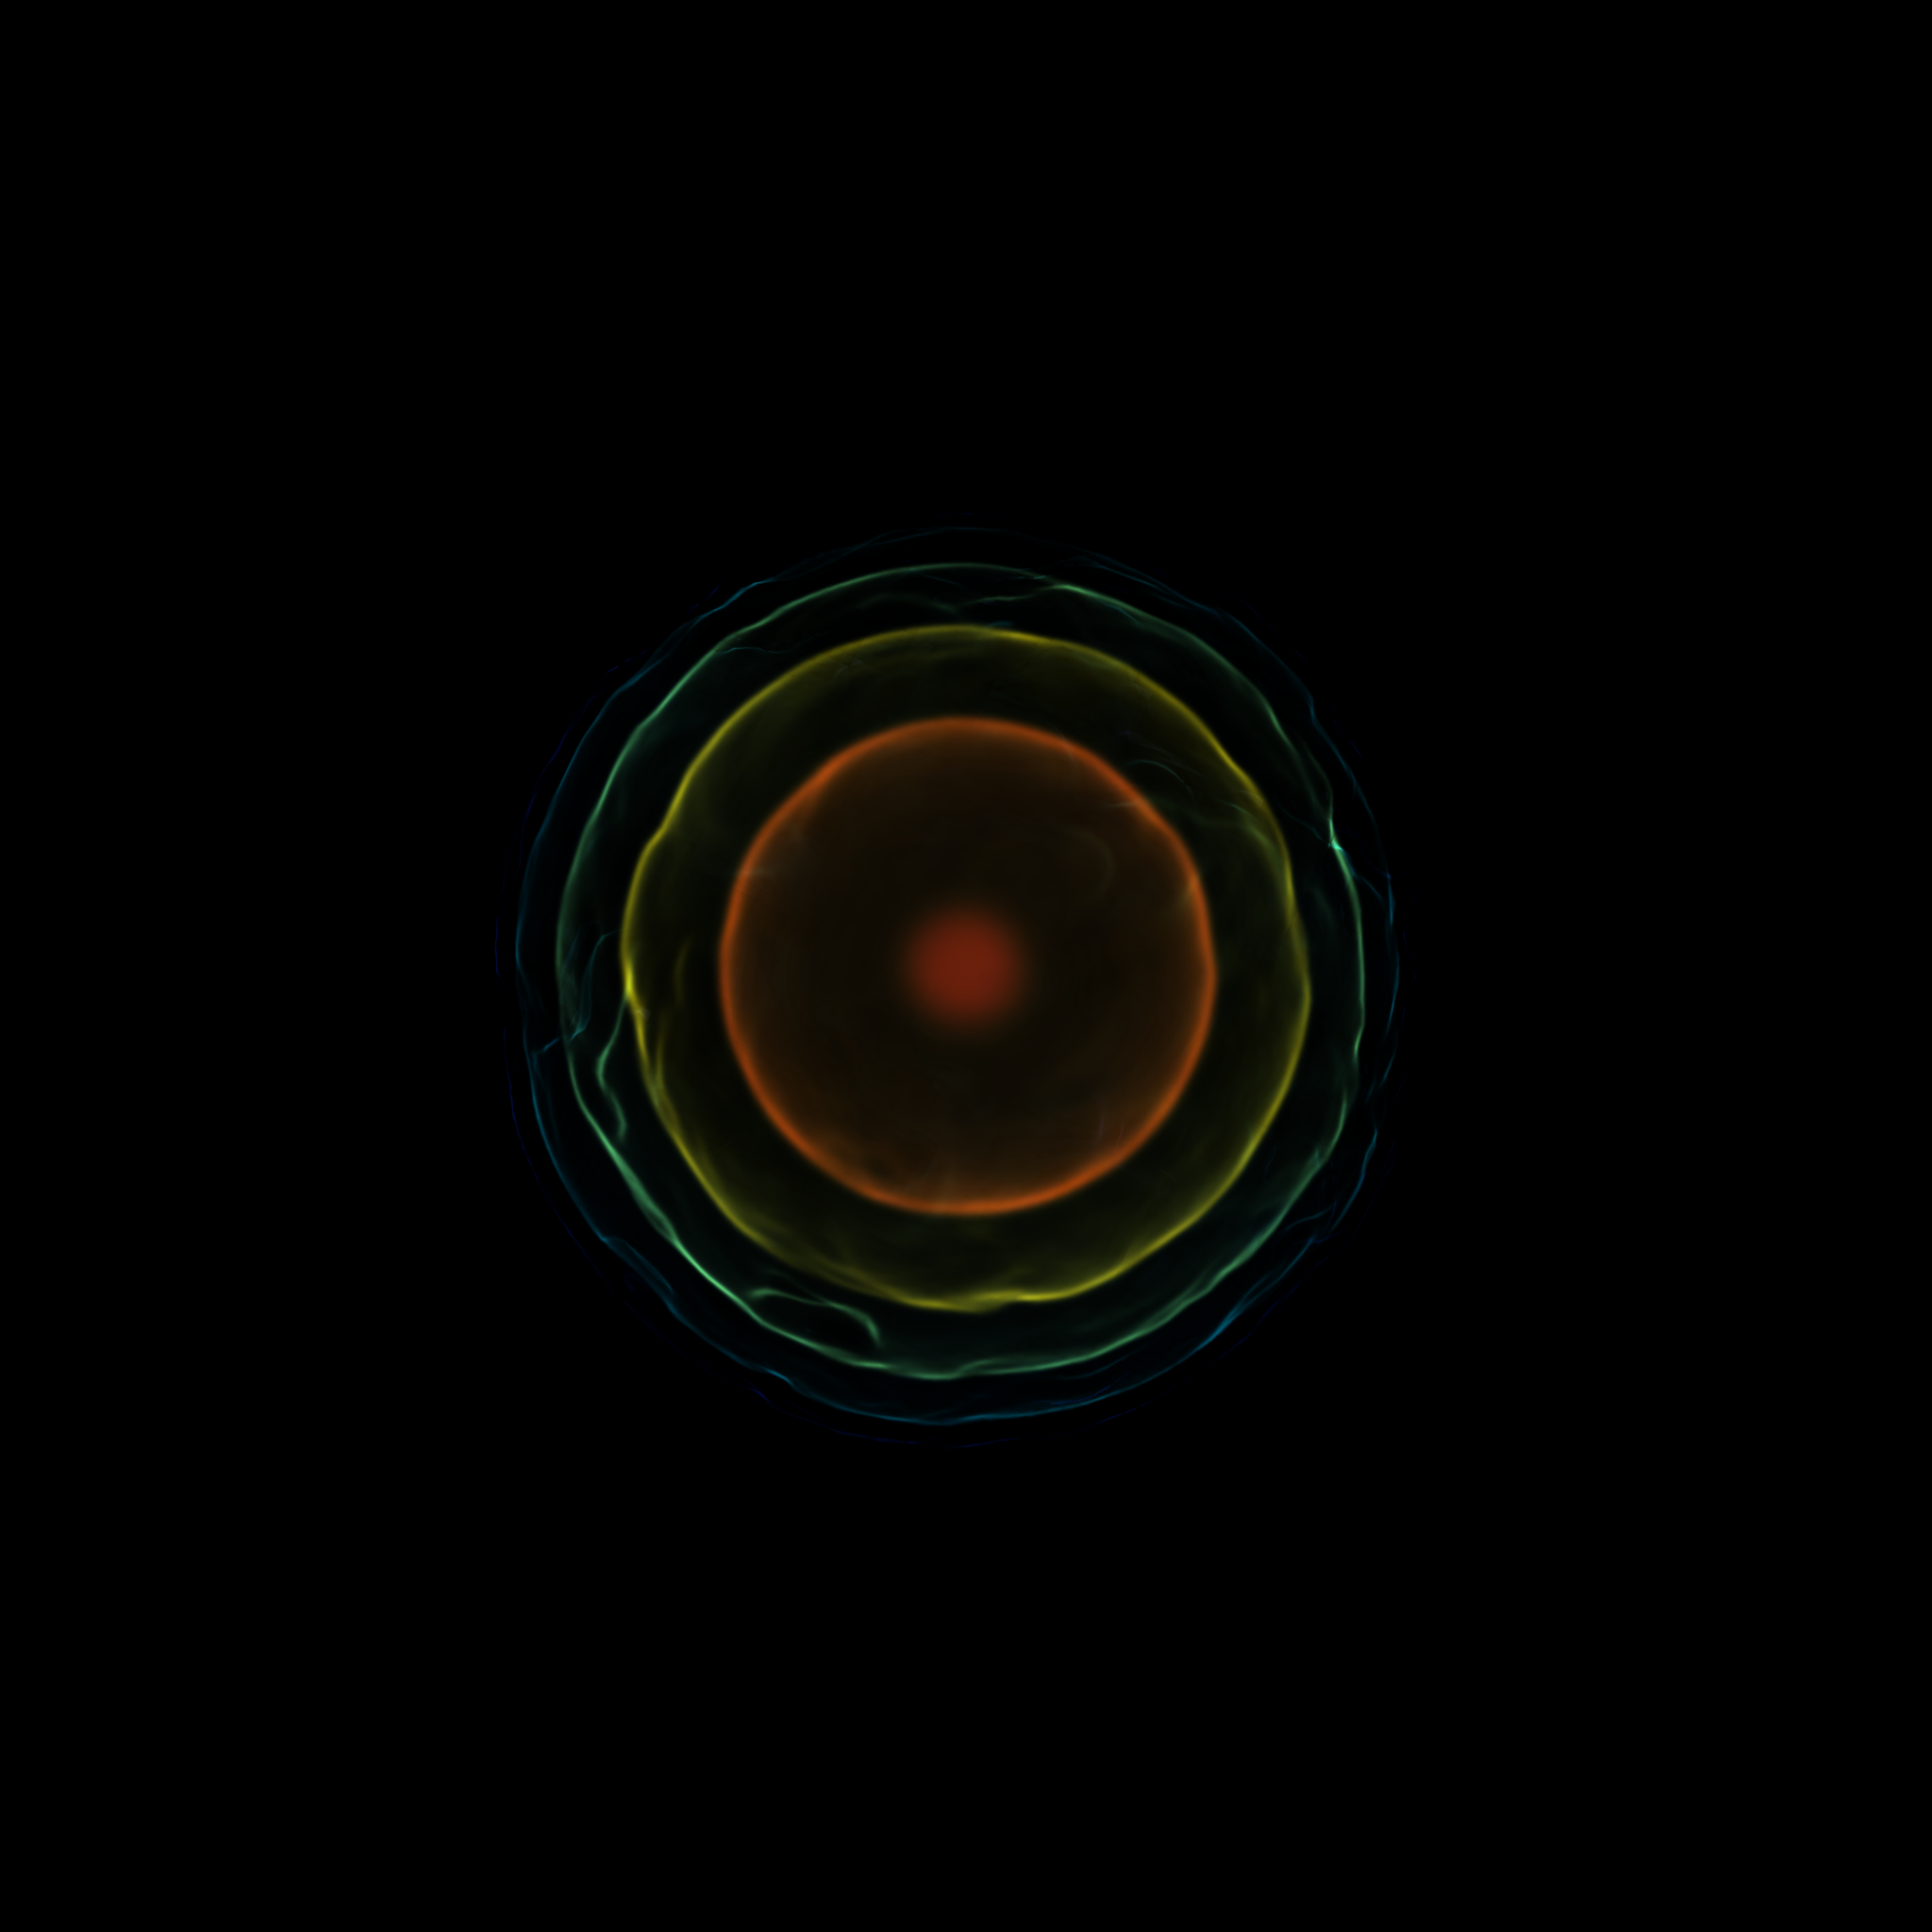

In [19]:
Image(filename='f_enucdot_lvl3.png')

yt : [INFO     ] 2018-06-22 13:26:58,339 Rendering scene (Can take a while).
yt : [INFO     ] 2018-06-22 13:26:58,352 Creating volume
/home/cdegrendele/yt-conda/lib/python3.6/site-packages/yt/units/yt_array.py:1293: RuntimeWarning: divide by zero encountered in log10
  out_arr = func(np.asarray(inp), out=out, **kwargs)
/home/cdegrendele/yt-conda/lib/python3.6/site-packages/yt/units/yt_array.py:1293: RuntimeWarning: invalid value encountered in log10
  out_arr = func(np.asarray(inp), out=out, **kwargs)
yt : [INFO     ] 2018-06-22 13:27:59,770 Rendering scene (Can take a while).
yt : [INFO     ] 2018-06-22 13:28:36,168 Saving render f_enucdot_lvl4.png


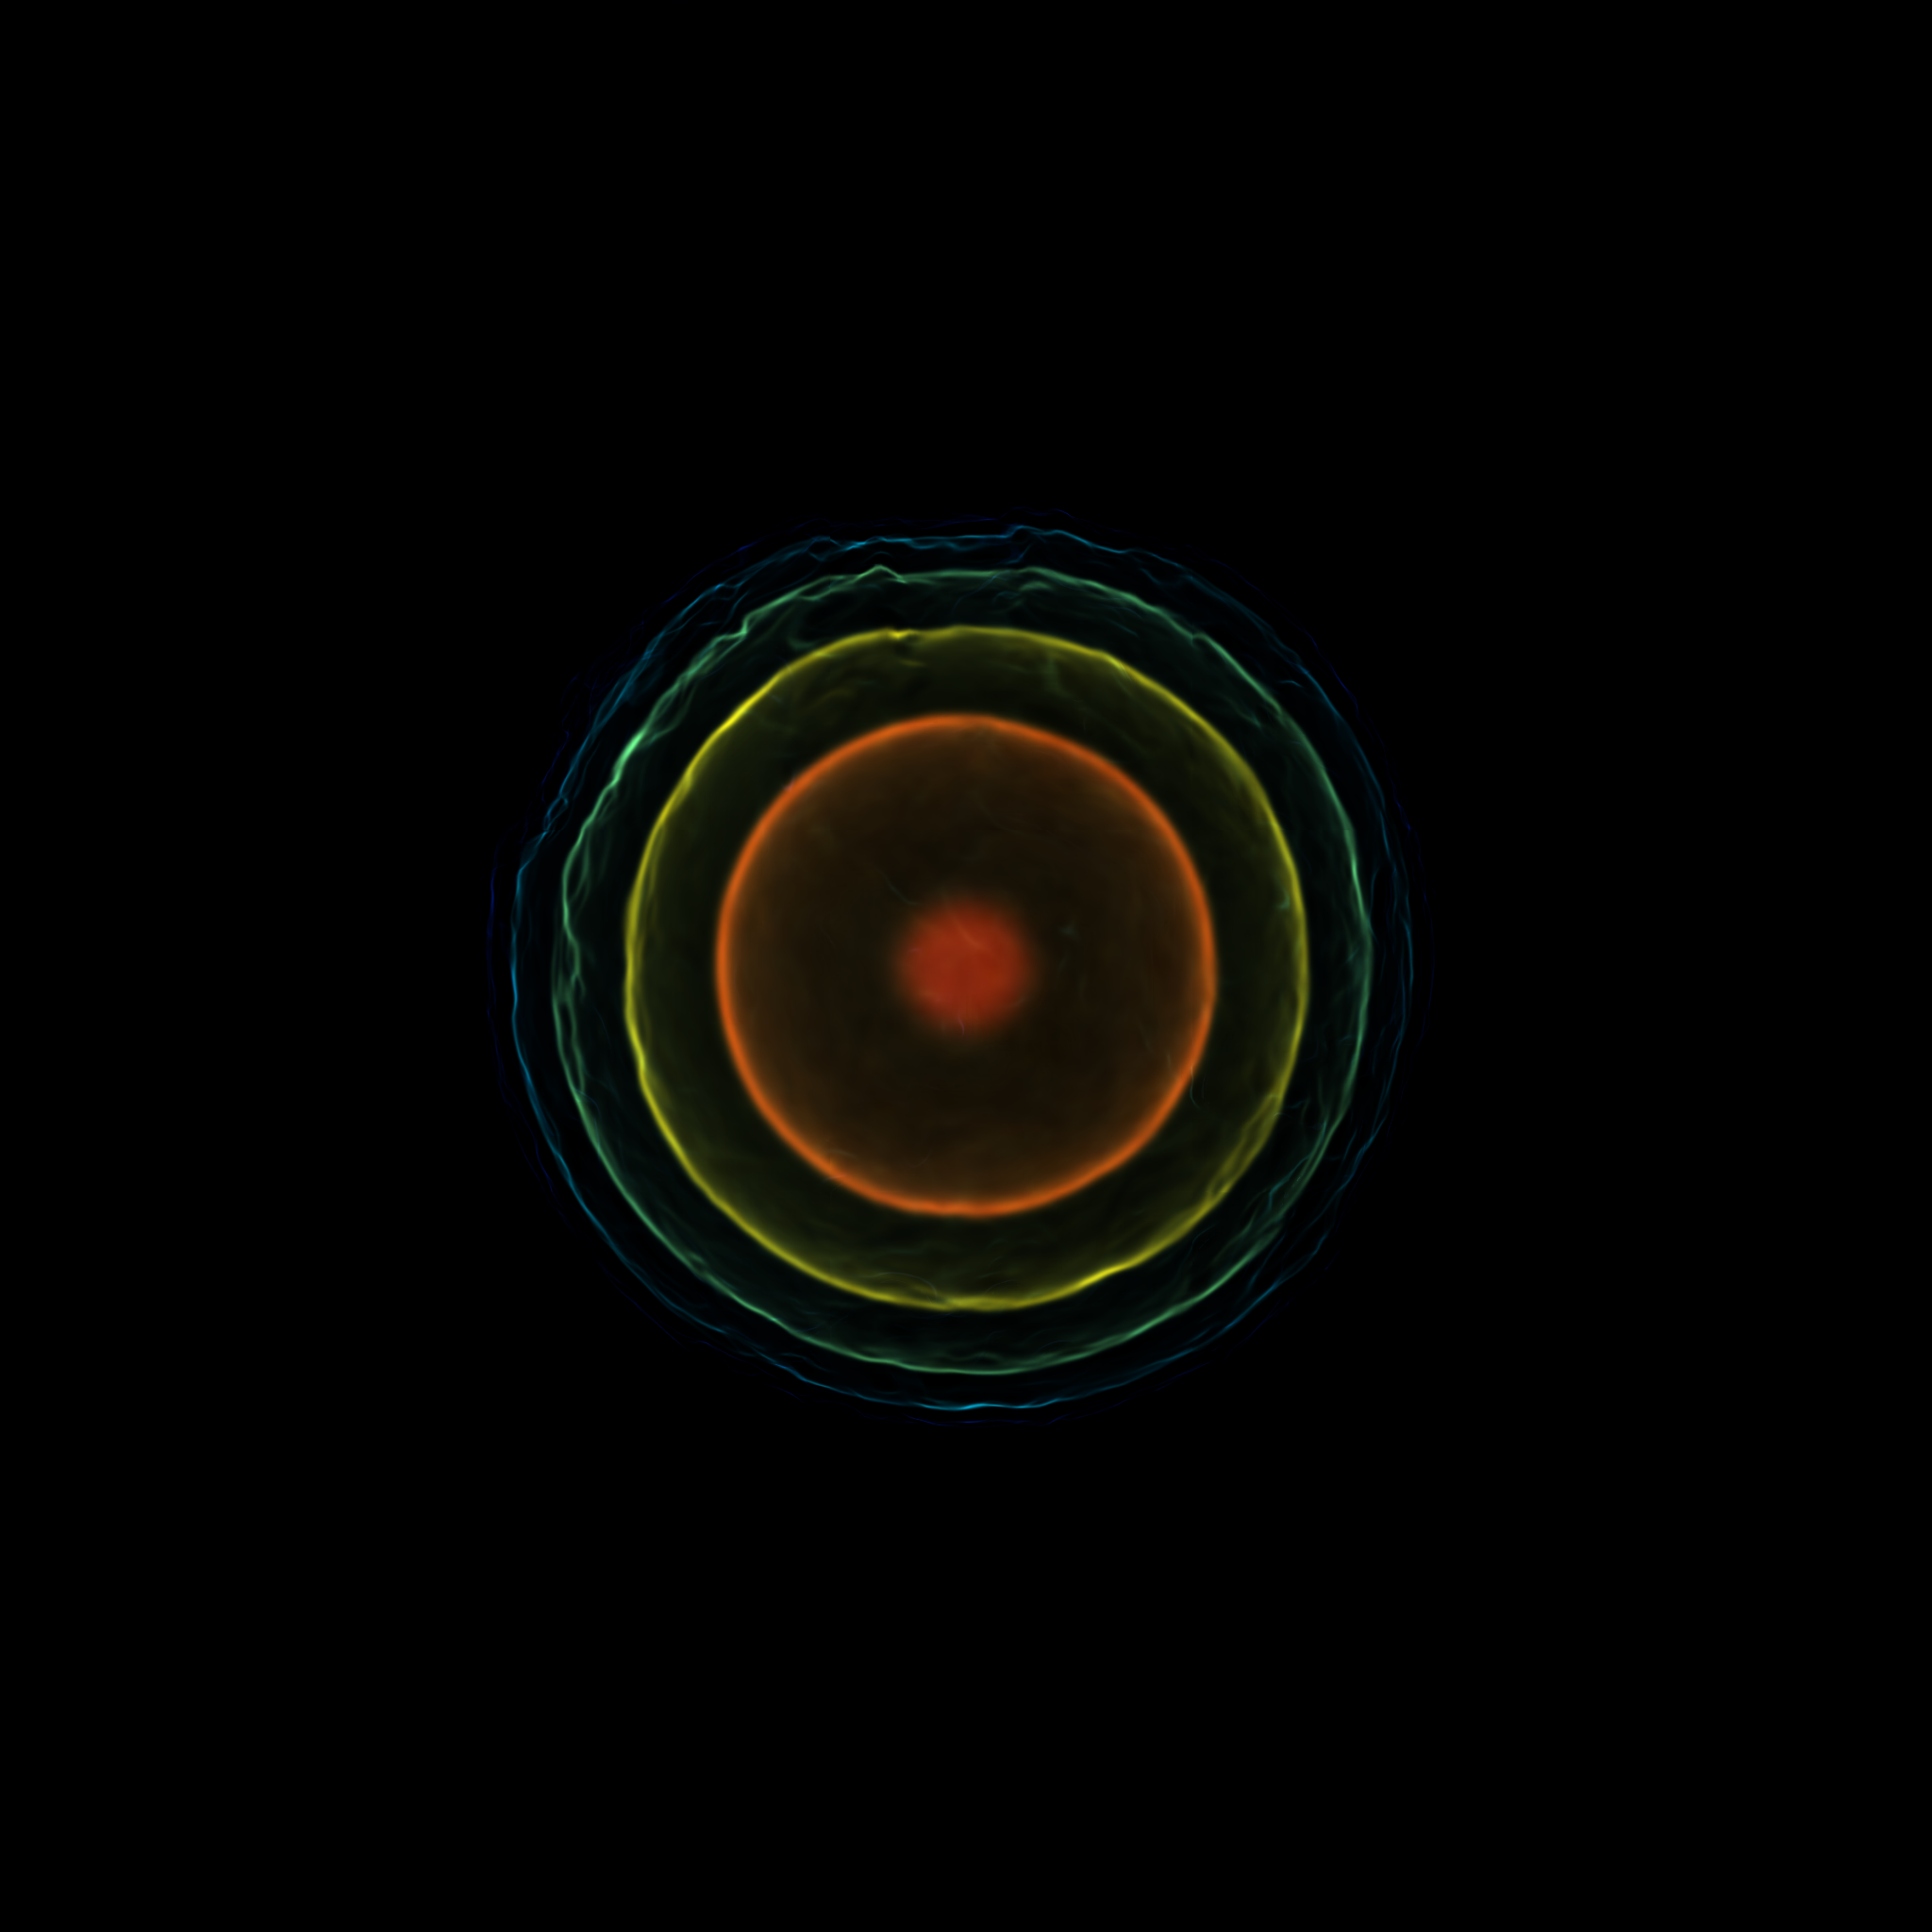

In [10]:
#Energy generation for level 4

slice = ds4.r[:,:(256125000, 'cm'),:]
sc = Scene()
so = VolumeSource(slice,'enucdot')

bounds = np.array([1.0e9, 1.5e12])
sigma  = 0.04


tfh = TransferFunctionHelper(ds4)
tfh.set_field('enucdot')
tfh.set_log(True)
tfh.grey_opacity = True
tfh.set_bounds(bounds)
tfh.build_transfer_function()
nlayers = 7
tfh.tf.add_layers(nlayers, colormap='Blue-Red', w=sigma**2)
tfh.plot(profile_field='enucdot')
so.transfer_function = tfh.tf

sc.add_source(so)

sc.add_camera()
sc.camera.focus = ds4.domain_center
sc.camera.resolution = 2048
sc.camera.zoom(6)
sc.camera.north_vector = [1,1,0]

sc.camera.position = ds4.domain_center + [0, 1.0, 0.0] * ds4.domain_width * 1.0e8/5.12e8

sc.render()
sc.save('f_enucdot_lvl4.png')

Image(filename='f_enucdot_lvl4.png')

yt : [INFO     ] 2018-06-22 11:04:08,082 Rendering scene (Can take a while).
yt : [INFO     ] 2018-06-22 11:04:08,113 Creating volume
/home/cdegrendele/yt-conda/lib/python3.6/site-packages/yt/units/yt_array.py:1293: RuntimeWarning: divide by zero encountered in log10
  out_arr = func(np.asarray(inp), out=out, **kwargs)
/home/cdegrendele/yt-conda/lib/python3.6/site-packages/yt/units/yt_array.py:1293: RuntimeWarning: invalid value encountered in log10
  out_arr = func(np.asarray(inp), out=out, **kwargs)
yt : [INFO     ] 2018-06-22 11:05:44,180 Rendering scene (Can take a while).
yt : [INFO     ] 2018-06-22 11:06:50,942 Saving render f_enucdot_lvl4.png


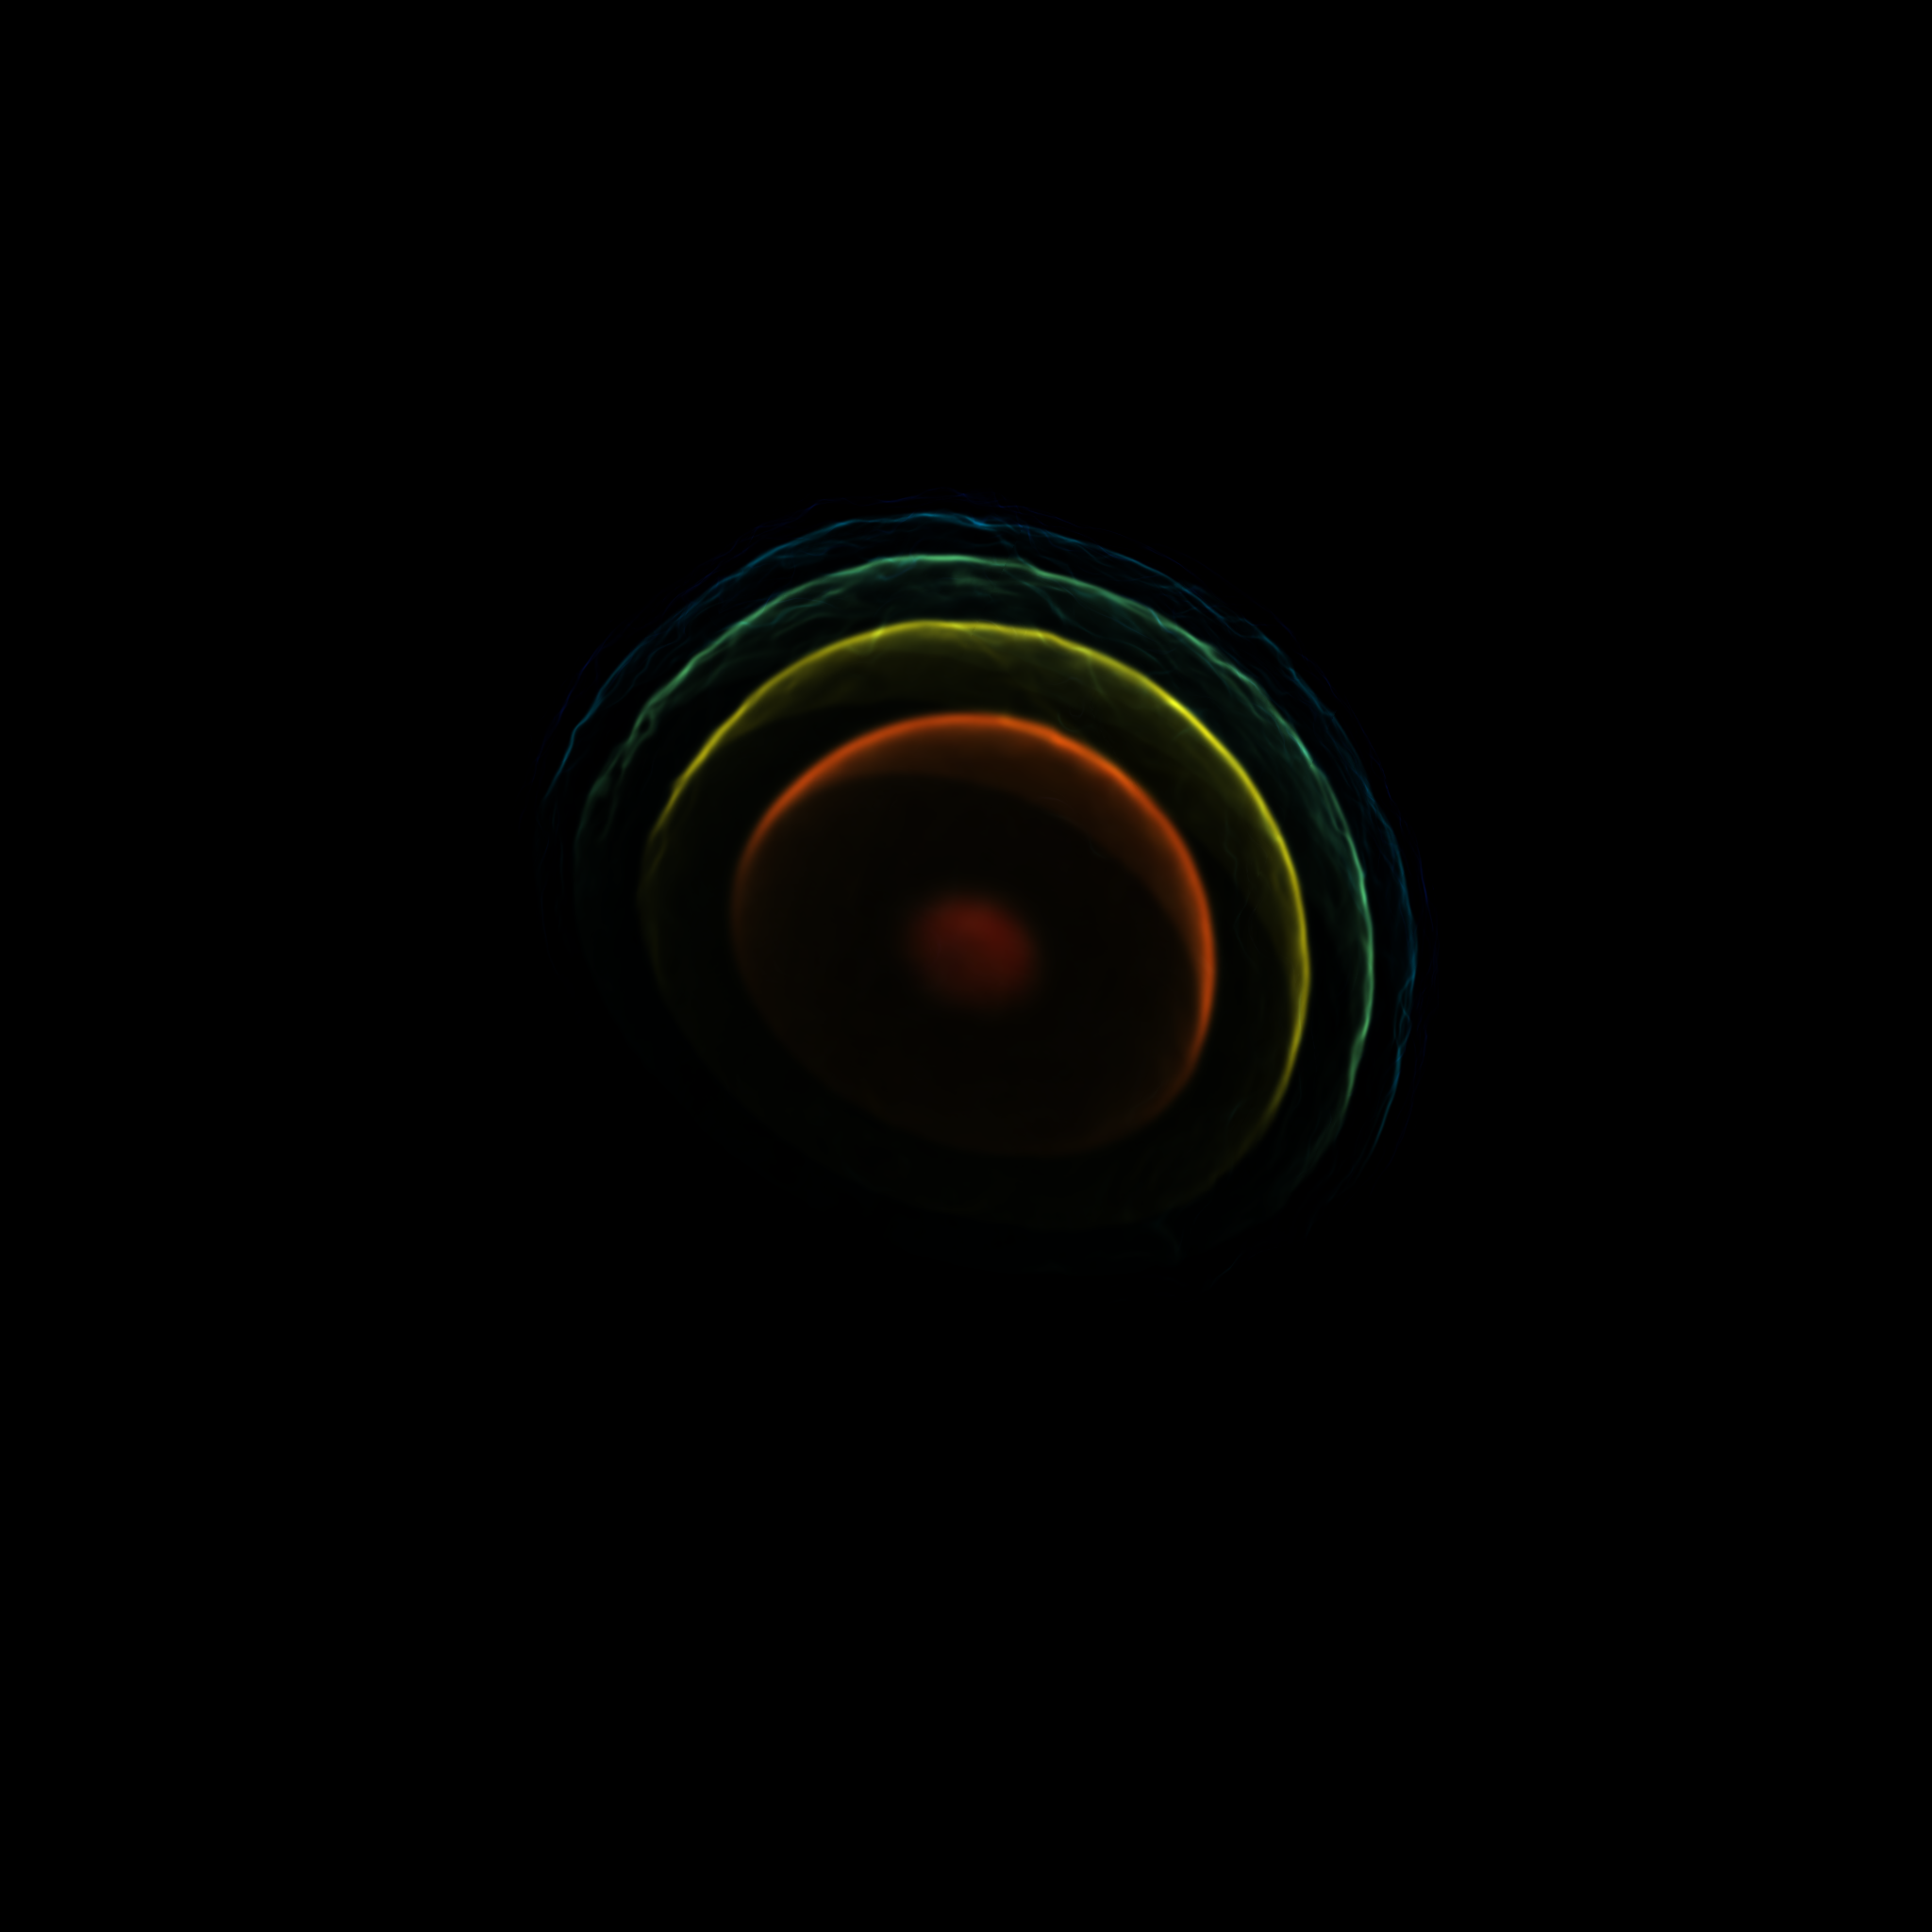

In [10]:
#Test to try out which side we are seeing.

slice = ds4.r[:,:(256125000, 'cm'),:]
sc = Scene()
so = VolumeSource(slice,'enucdot')

bounds = np.array([1.0e9, 1.5e12])
sigma  = 0.04


tfh = TransferFunctionHelper(ds4)
tfh.set_field('enucdot')
tfh.set_log(True)
tfh.grey_opacity = True
tfh.set_bounds(bounds)
tfh.build_transfer_function()
nlayers = 7
tfh.tf.add_layers(nlayers, colormap='Blue-Red', w=sigma**2)
tfh.plot(profile_field='enucdot')
so.transfer_function = tfh.tf

sc.add_source(so)

sc.add_camera()
sc.camera.focus = ds4.domain_center
sc.camera.resolution = 2048
sc.camera.zoom(6)
#sc.camera.north_vector = [1,1,0]

sc.camera.position = ds4.domain_center + [1, 1.0, 0.0] * ds4.domain_width * 1.0e8/5.12e8

sc.render()
sc.save('f_enucdot_lvl4.png')

Image(filename='f_enucdot_lvl4.png')



Image(filename='f_enucdot_lvl4.png')

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------------

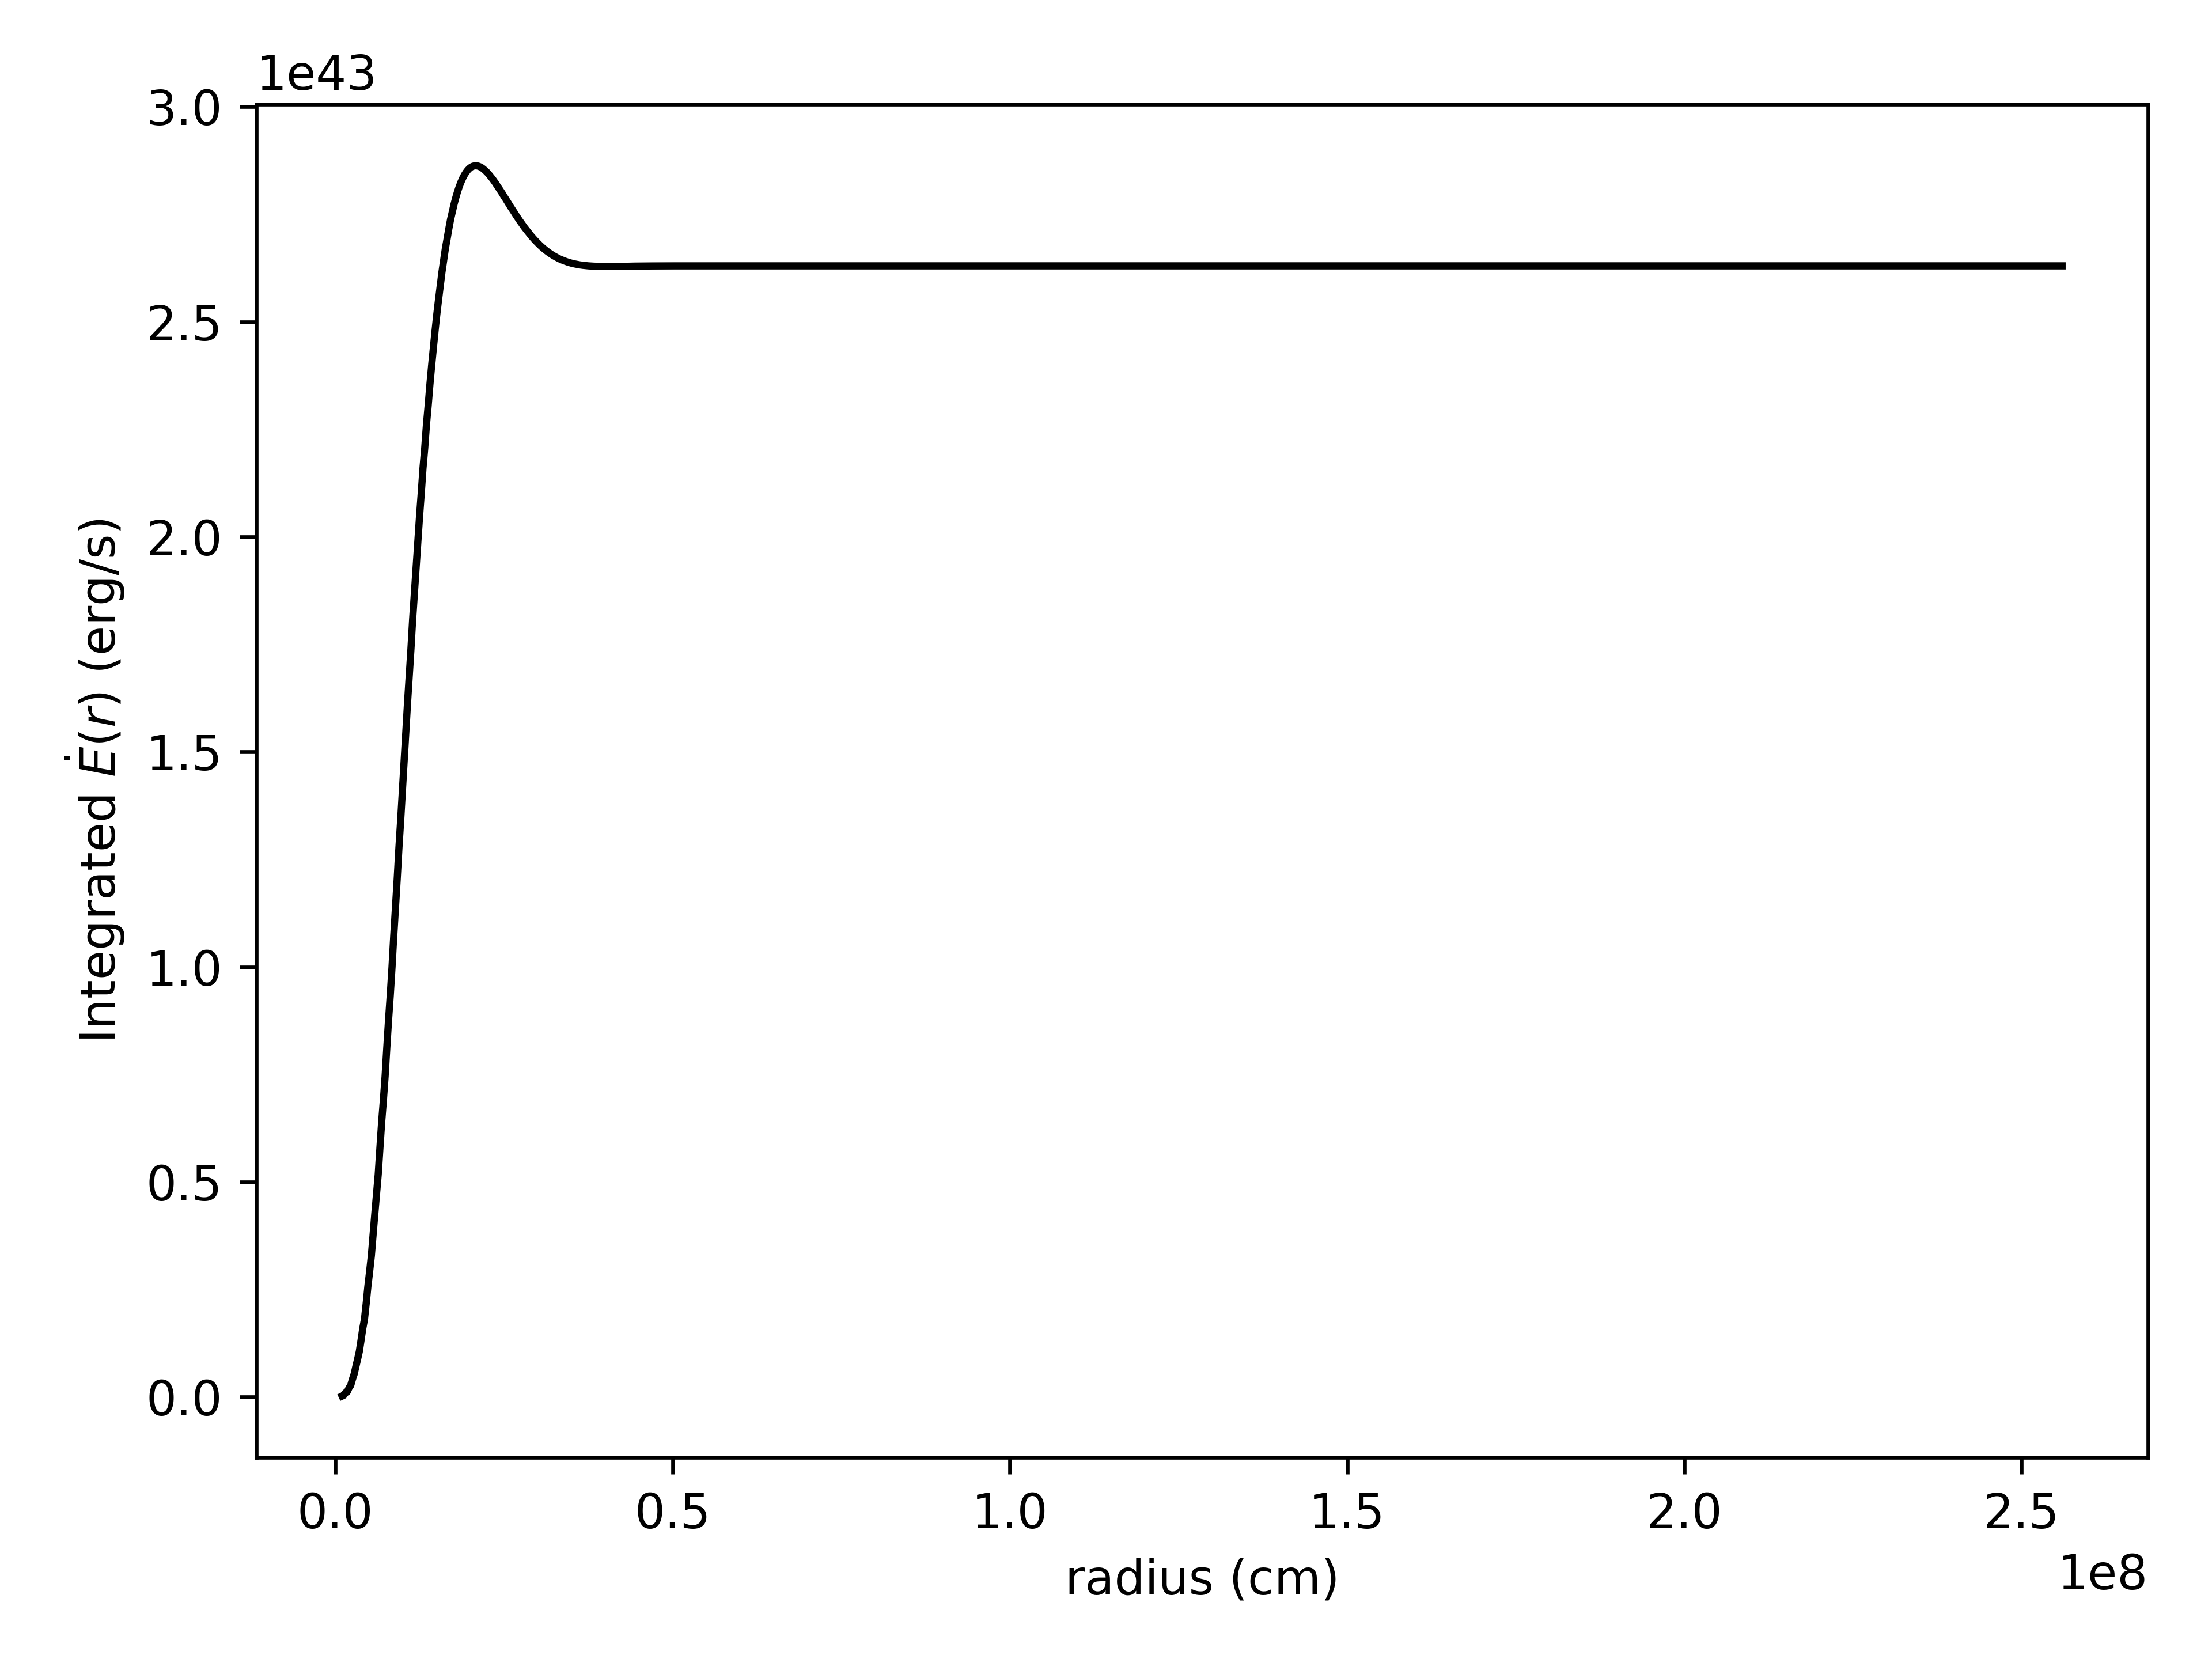

In [11]:
# LEVEL 3 RUNNING plot-edot.py

Image(filename='/home/cdegrendele/summer2018/MAESTRO-master/Util/postprocessing/urca-tools/wd_3lev_Tc5-5e8_rhoc4-5e9_plt03971_edotvr.png')

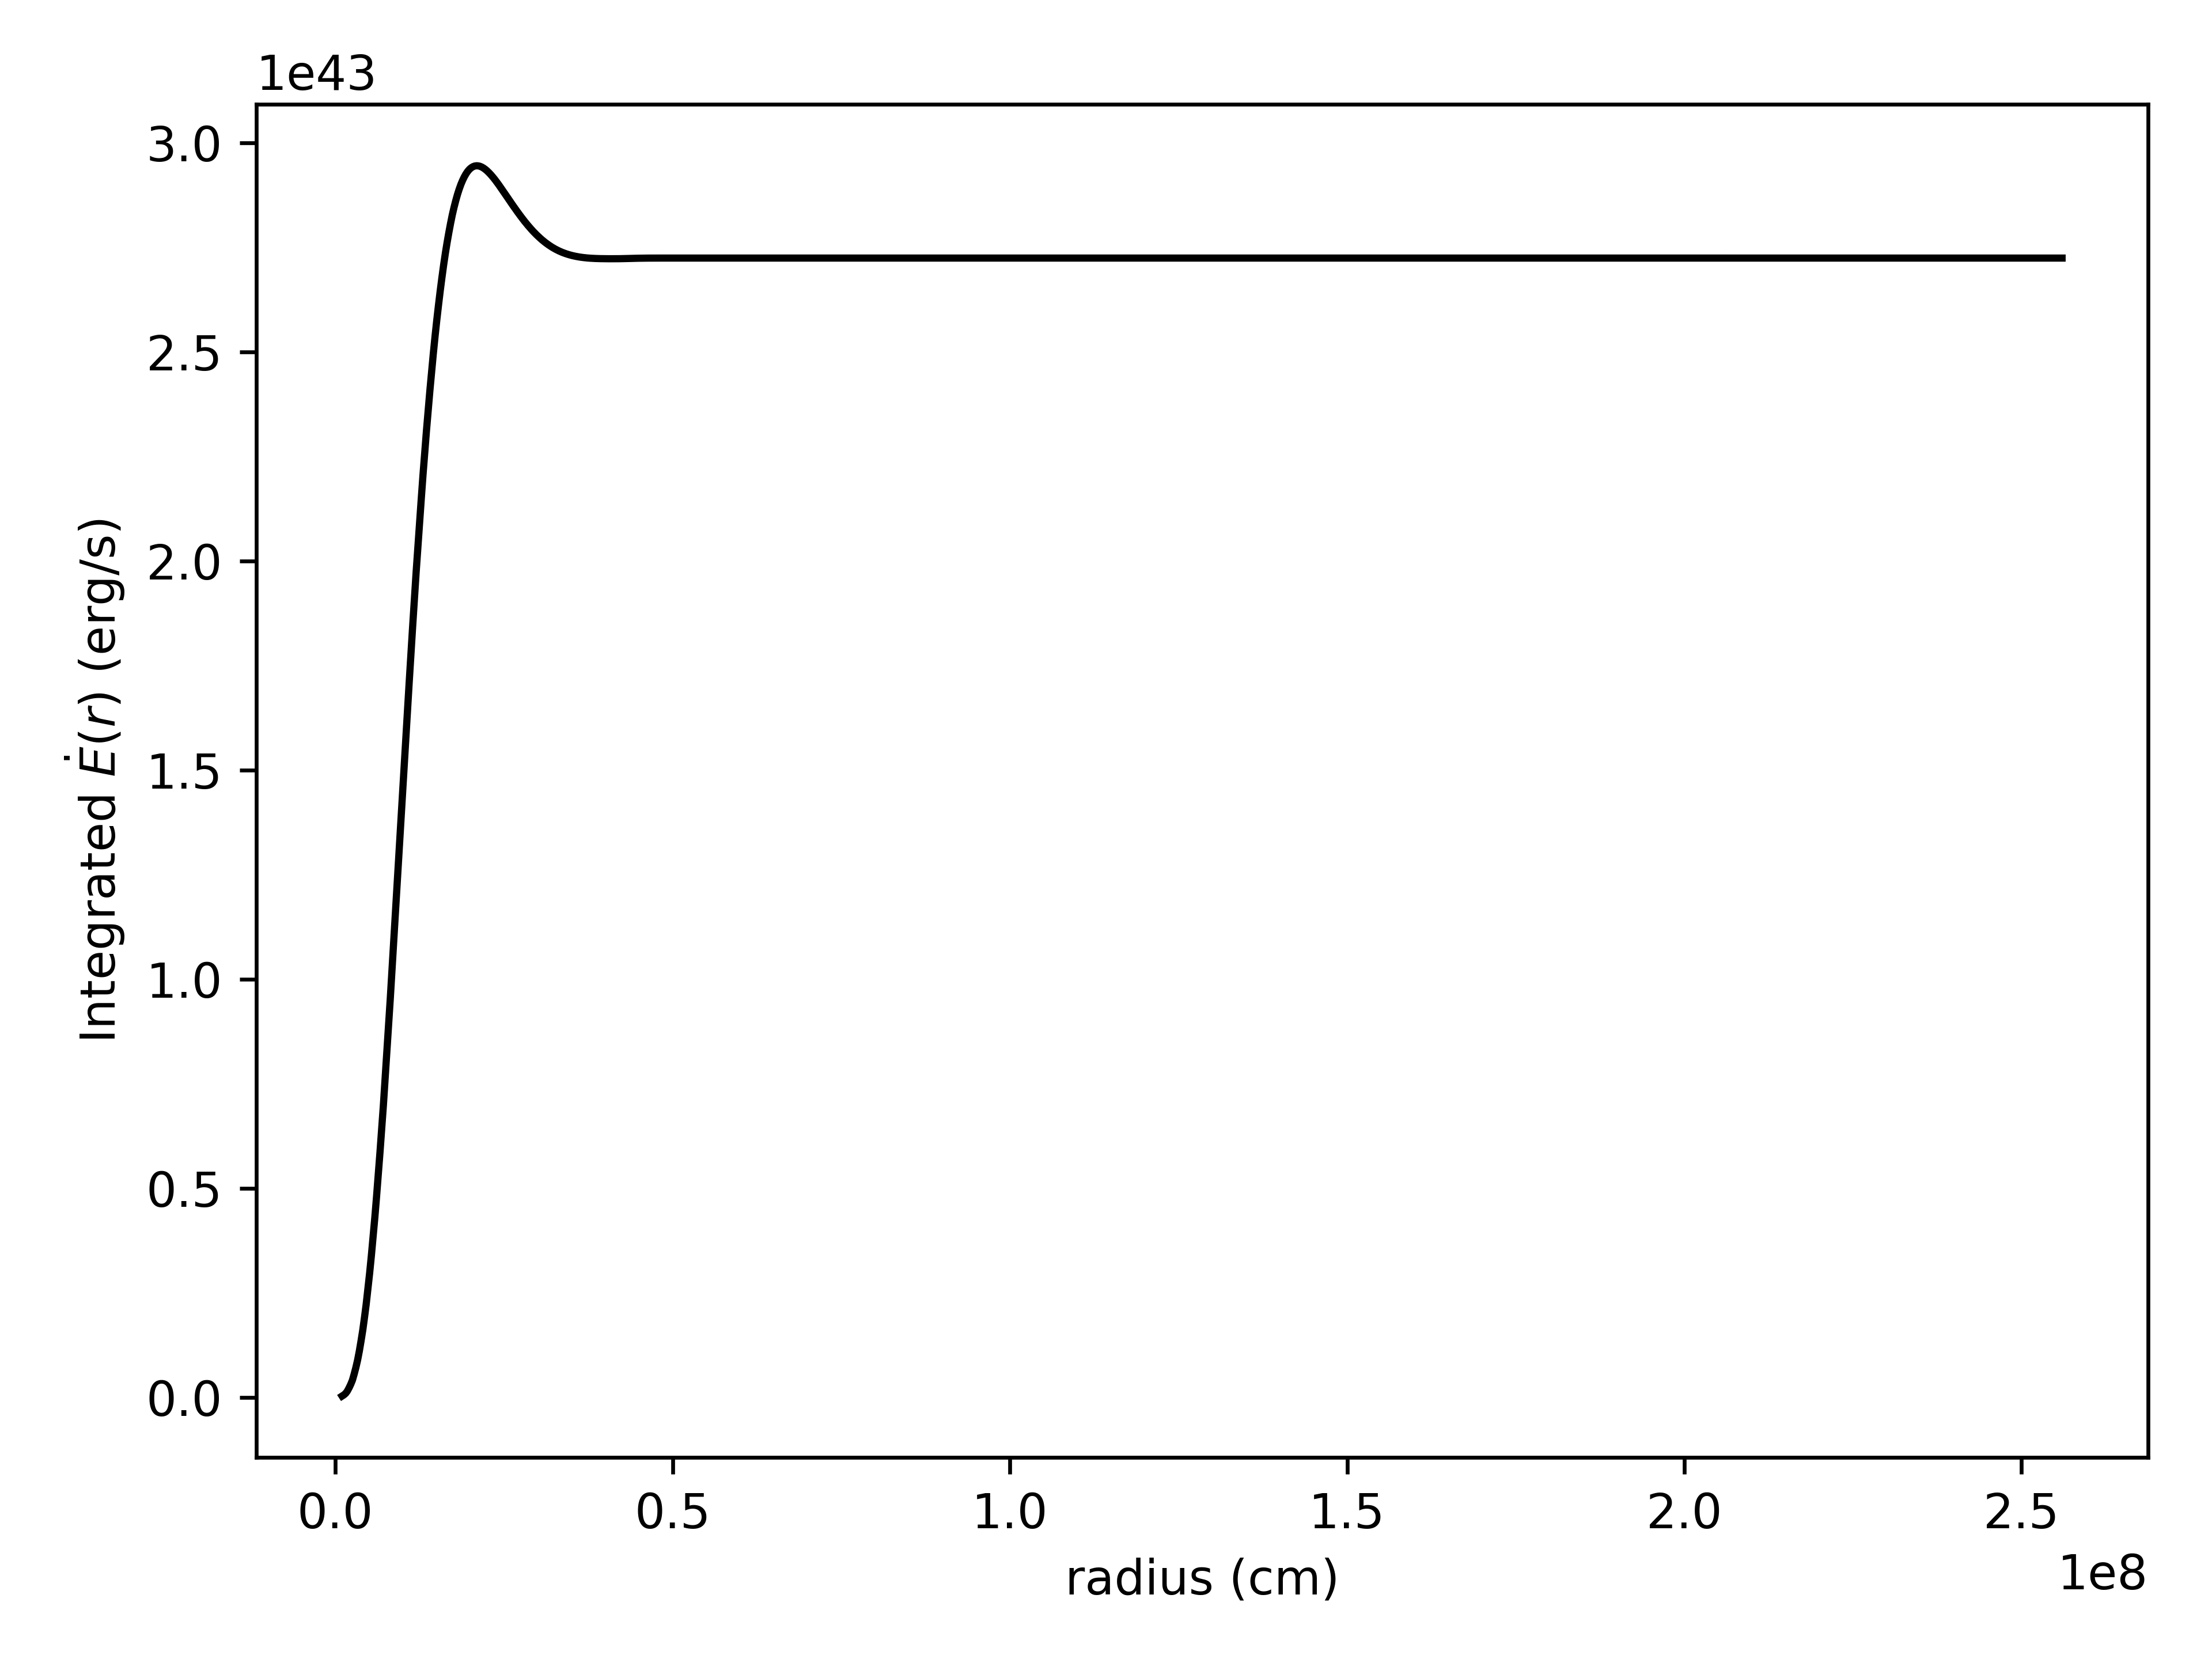

In [3]:
s# LEVEL 4 RUNNING plot-edot.py

Image(filename='/home/cdegrendele/summer2018/MAESTRO-master/Util/postprocessing/urca-tools/wd_4lev_Tc5-5e8_rhoc4-5e9_plt06605_edotvr.png')

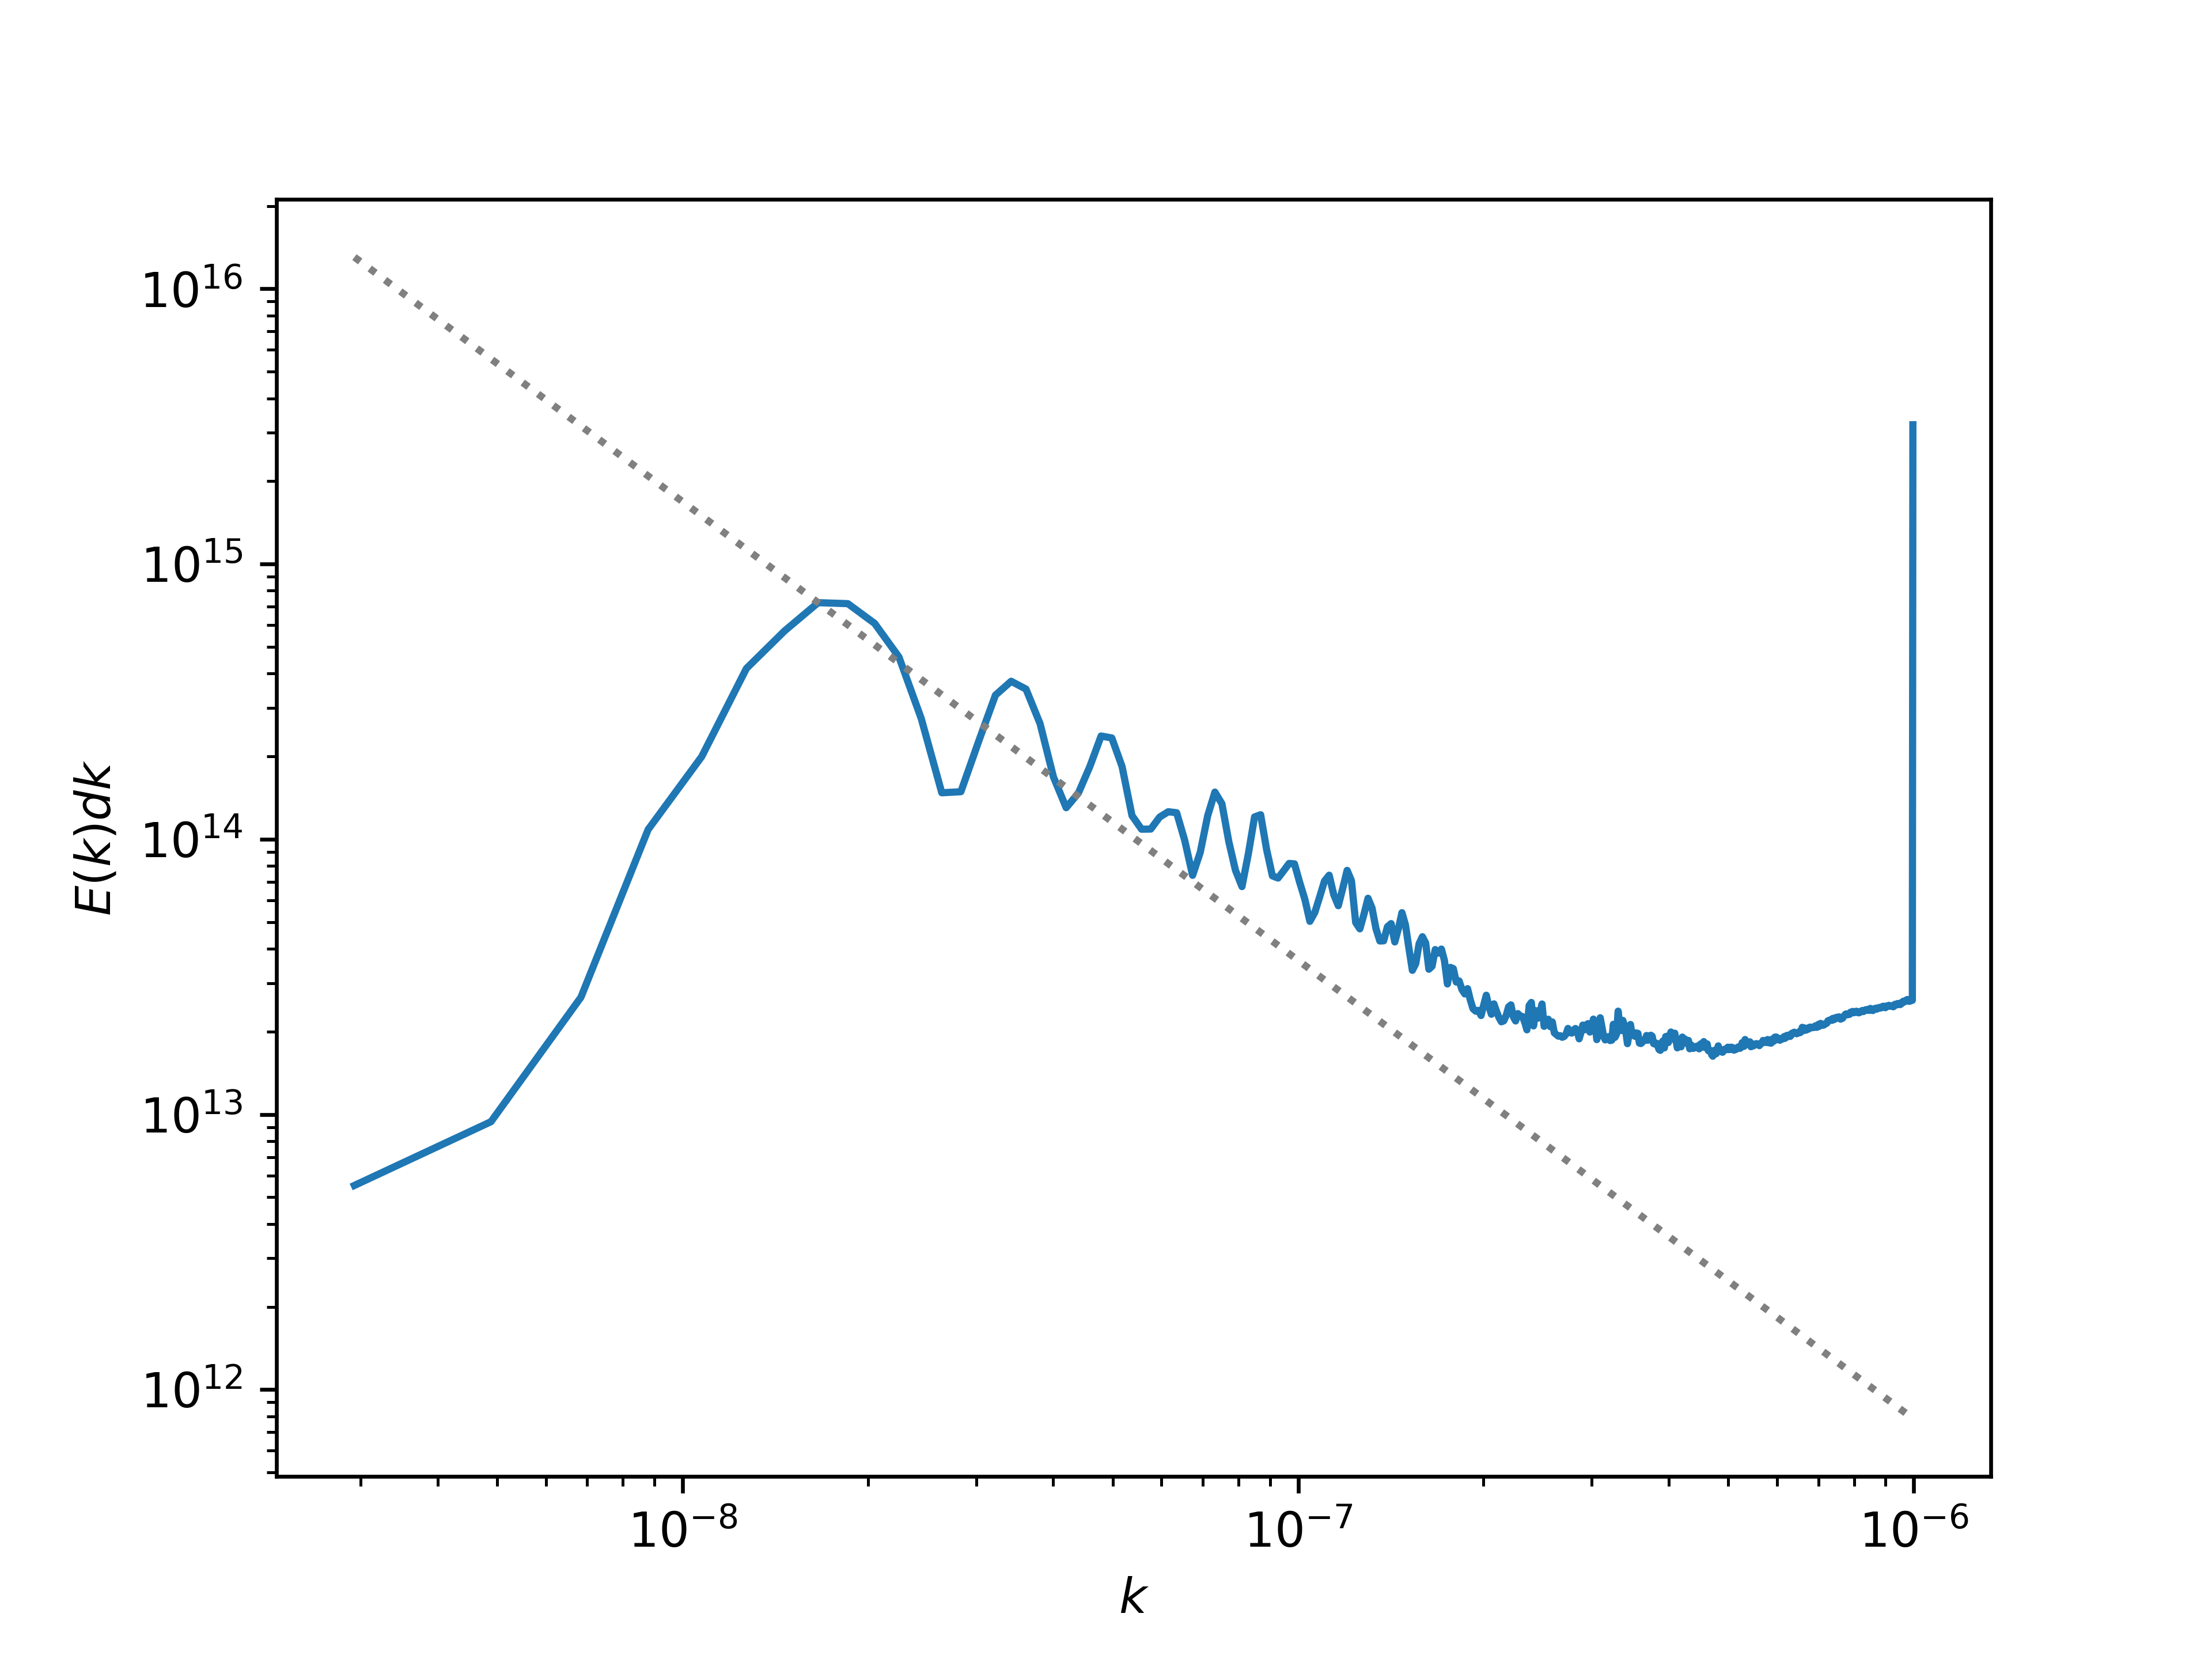

In [5]:
# LEVEL 4 RUNNING ./power_spectrum.py "file" --level 1

Image(filename='/home/cdegrendele/summer2018/MAESTRO-master/Util/postprocessing/urca-tools/wd_4lev_Tc5-5e8_rhoc4-5e9_plt06605_spectrum.png')

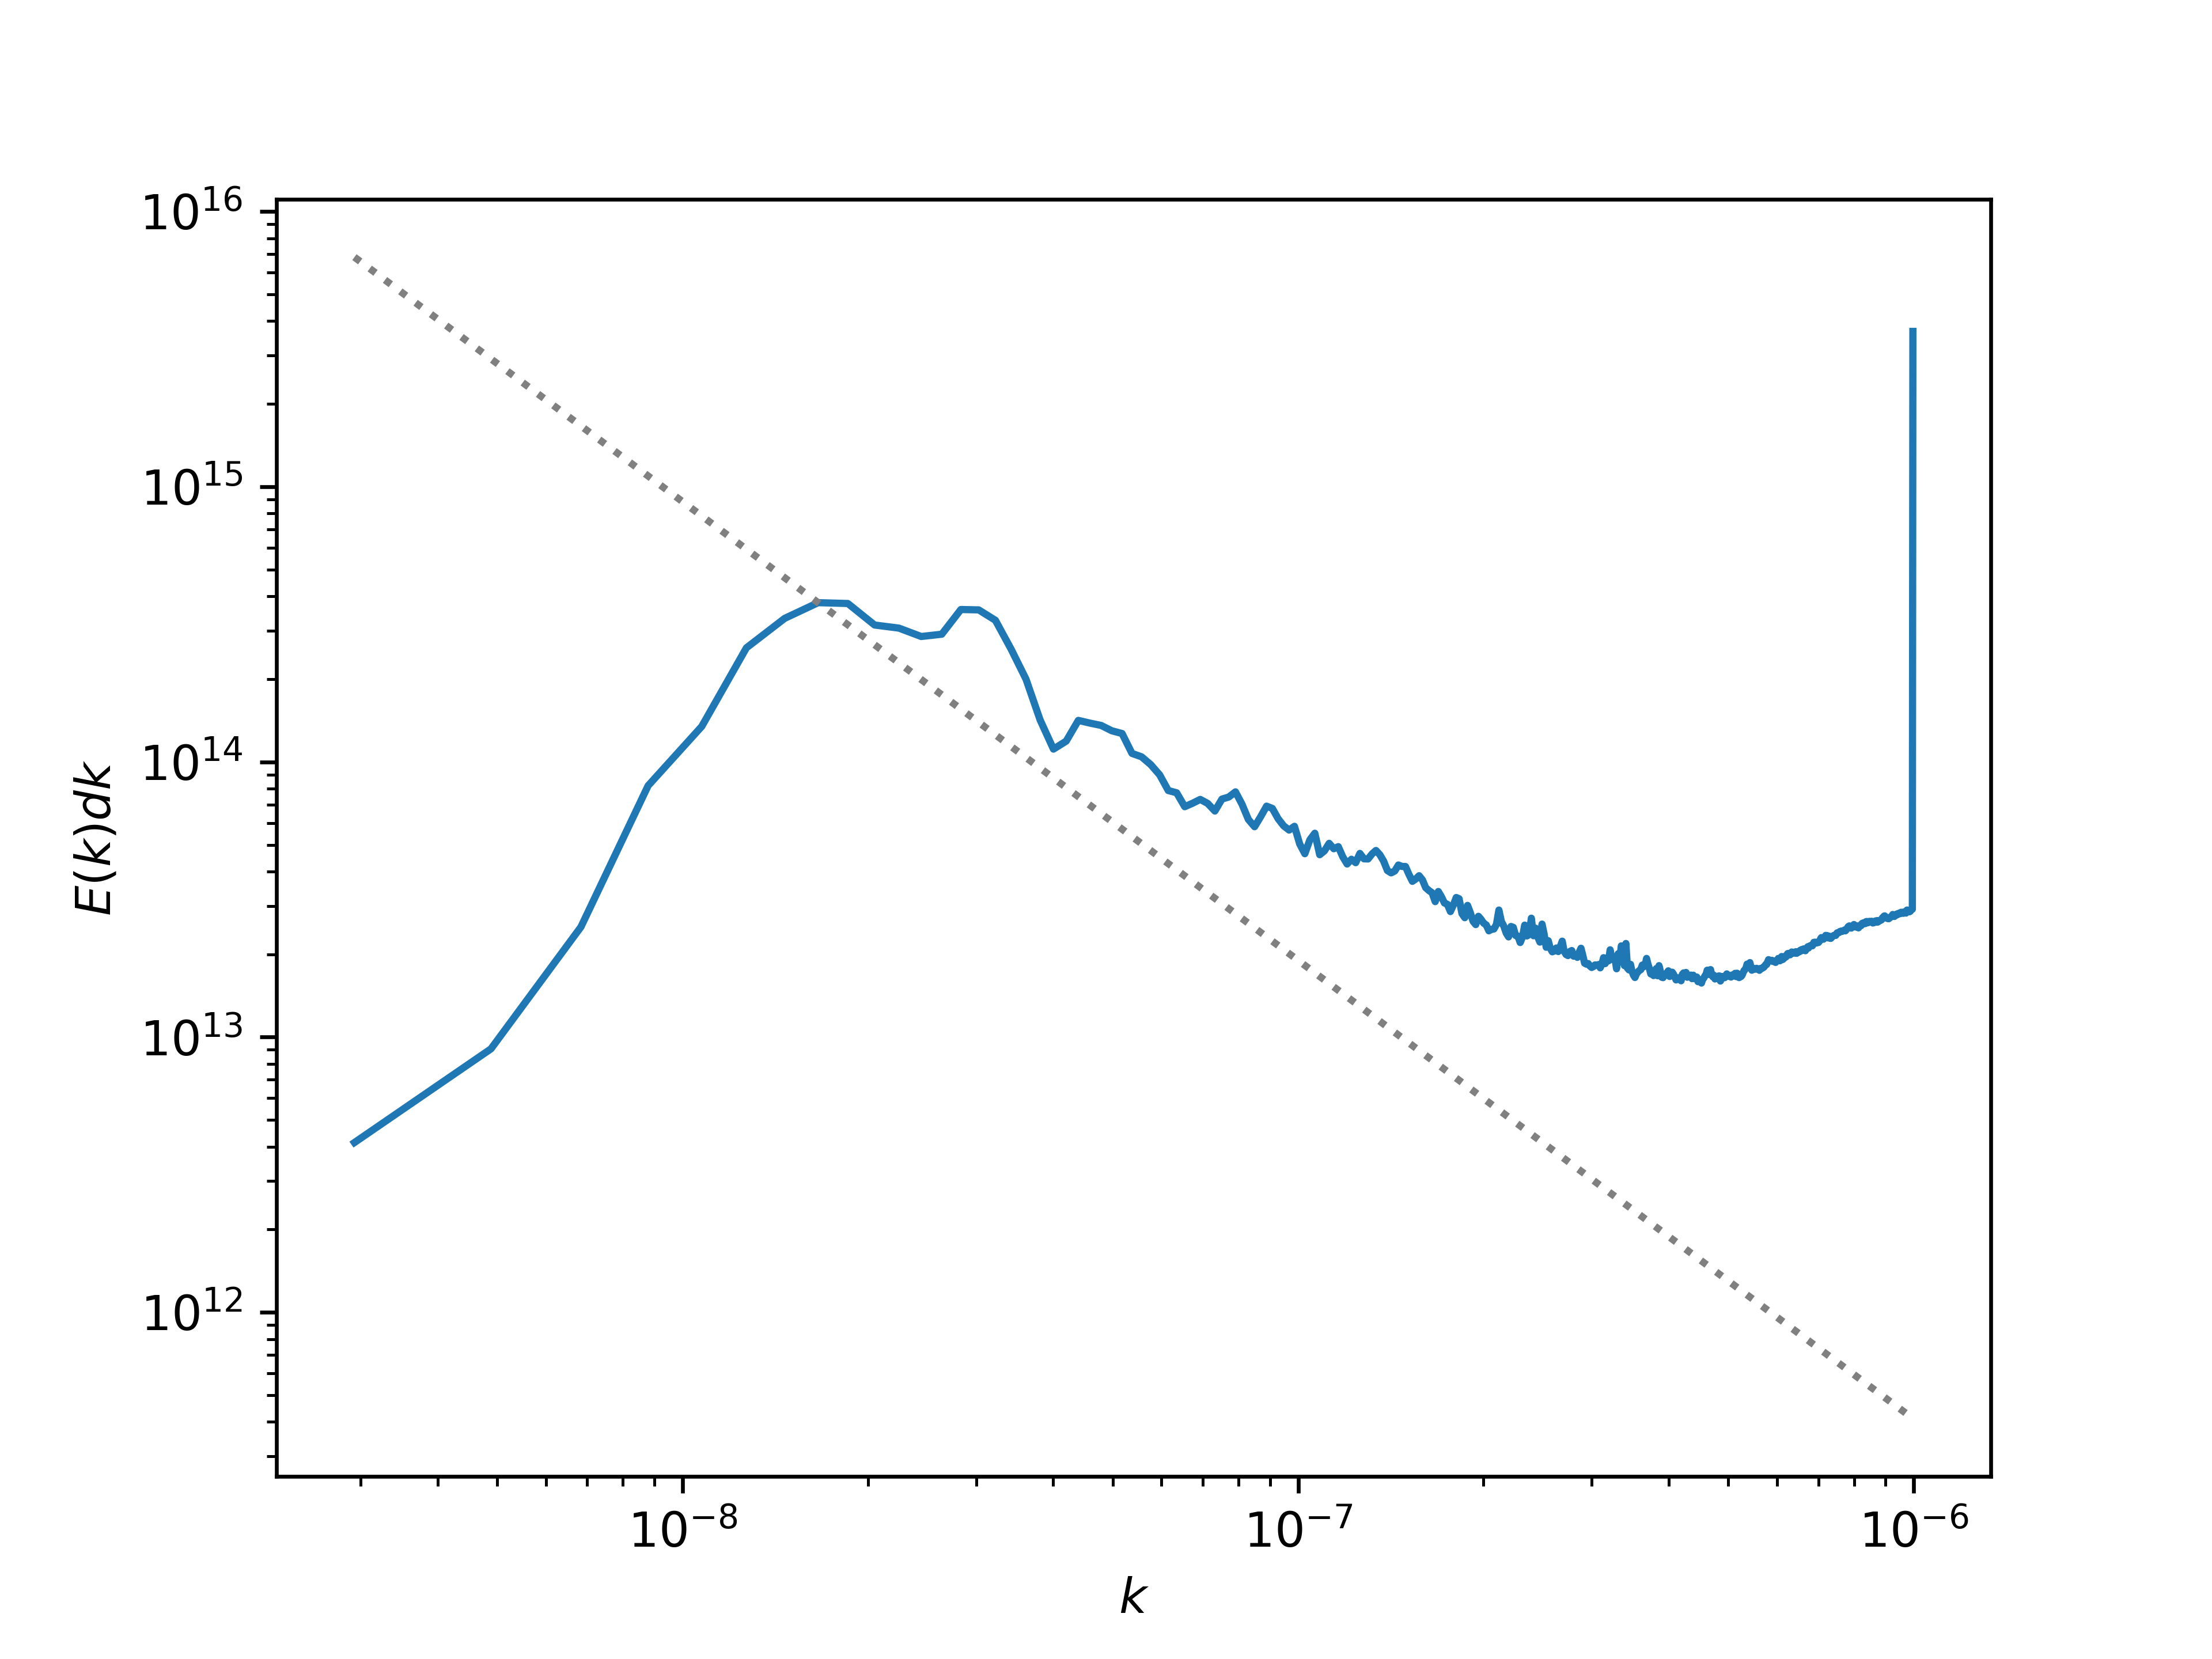

In [4]:
# LEVEL 3 RUNNING ./power_spectrum.py "file" --level 1

Image(filename='/home/cdegrendele/summer2018/MAESTRO-master/Util/postprocessing/urca-tools/wd_3lev_Tc5-5e8_rhoc4-5e9_plt03971_spectrum.png')

In [11]:
#An attempt to get white backgrounds for level 4

im, sc = yt.volume_render(ds4,"radial_velocity")
im_arr = im
im_arr.rescale()

new_im.write_png('trial.png')

Image(filename='original.png')

yt : [INFO     ] 2018-06-22 11:06:54,285 Rendering scene (Can take a while).
yt : [INFO     ] 2018-06-22 11:06:54,288 Creating volume
/home/cdegrendele/yt-conda/lib/python3.6/site-packages/yt/units/yt_array.py:1293: RuntimeWarning: invalid value encountered in log10
  out_arr = func(np.asarray(inp), out=out, **kwargs)
yt : [INFO     ] 2018-06-22 11:07:35,753 Creating transfer function
yt : [INFO     ] 2018-06-22 11:07:35,754 Calculating data bounds. This may take a while.  Set the TransferFunctionHelper.bounds to avoid this.
yt : [INFO     ] 2018-06-22 11:07:52,128 Rendering scene (Can take a while).
yt : [INFO     ] 2018-06-22 11:08:05,058 Saving render wd_4lev_Tc5-5e8_rhoc4-5e9_plt06605_Render_radial_velocity.png


NameError: name 'new_im' is not defined

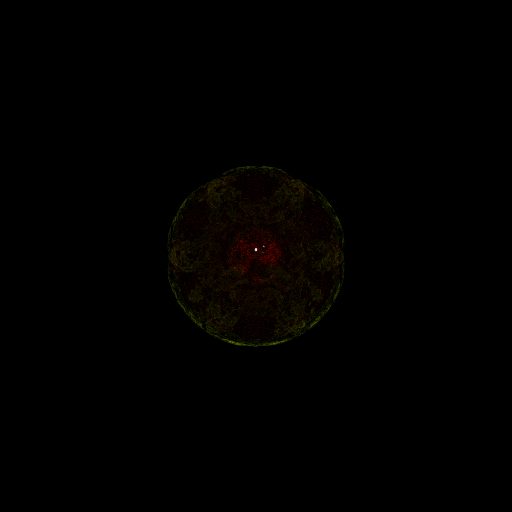

In [14]:
Image(filename='red_bg.png')

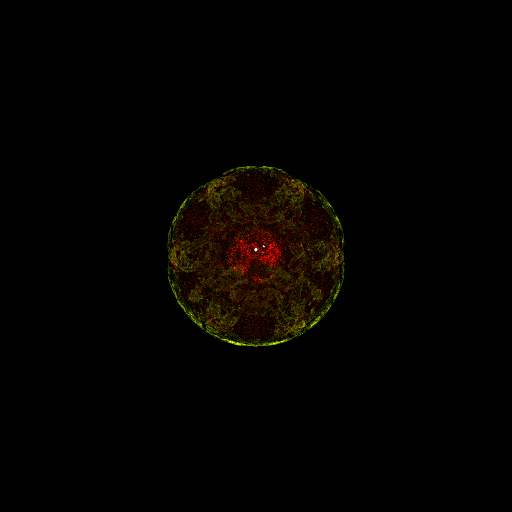

In [11]:
Image(filename='original.png')

In [24]:
#Lets do some stuff to try to find the urca layer

yt : [INFO     ] 2018-06-18 13:59:04,324 Calculating data bounds. This may take a while.  Set the TransferFunctionHelper.bounds to avoid this.


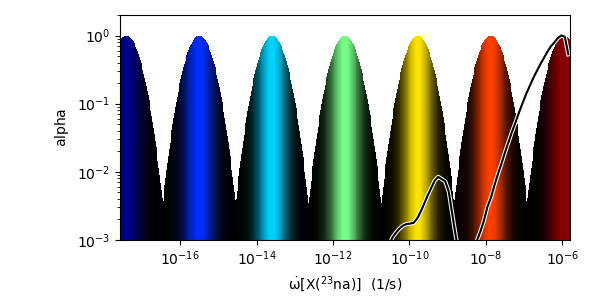

In [34]:
bounds = np.array([1.0e2, 1.0e7])
sigma  = 0.4

tfh = TransferFunctionHelper(ds4)
tfh.set_field('omegadot(na23)')
tfh.set_log(True)
tfh.grey_opacity = True
#tfh.set_bounds(bounds)
tfh.build_transfer_function()
nlayers = 7
tfh.tf.add_layers(nlayers, colormap='Blue-Red', w=sigma**2)
tfh.plot(profile_field='omegadot(na23)')


yt : [INFO     ] 2018-06-18 13:59:27,201 Calculating data bounds. This may take a while.  Set the TransferFunctionHelper.bounds to avoid this.


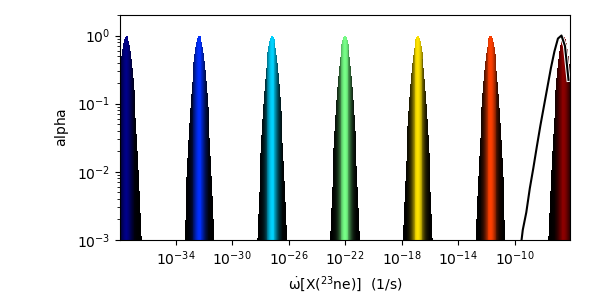

In [35]:
bounds = np.array([1.0e2, 1.0e7])
sigma  = 0.4

tfh = TransferFunctionHelper(ds3)
tfh.set_field('omegadot(ne23)')
tfh.set_log(True)
tfh.grey_opacity = True
#tfh.set_bounds(bounds)
tfh.build_transfer_function()
nlayers = 7
tfh.tf.add_layers(nlayers, colormap='Blue-Red', w=sigma**2)
tfh.plot(profile_field='omegadot(ne23)')

In [31]:
#We need that profile plot together, so we can get the radius of the URCA


In [47]:
ad = ds4.all_data()
profiles = yt.create_profile(ad, "radius", ["omegadot(ne23)"], weight_field=None,    
                      accumulation=True )

plot = yt.ProfilePlot.from_profiles(profiles)
plot.set_xlim(1.0e5, 1.0e9)
plot.set_ylim('omegadot(ne23)', 1.0e-6, 1.0e0)
plot.save("omegadotne23_profileplot.png")


yt : [INFO     ] 2018-06-19 17:42:09,636 Saving omegadotne23_profileplot.png
yt : [INFO     ] 2018-06-19 17:42:09,637 Saving plot omegadotne23_profileplot.png


['omegadotne23_profileplot.png']

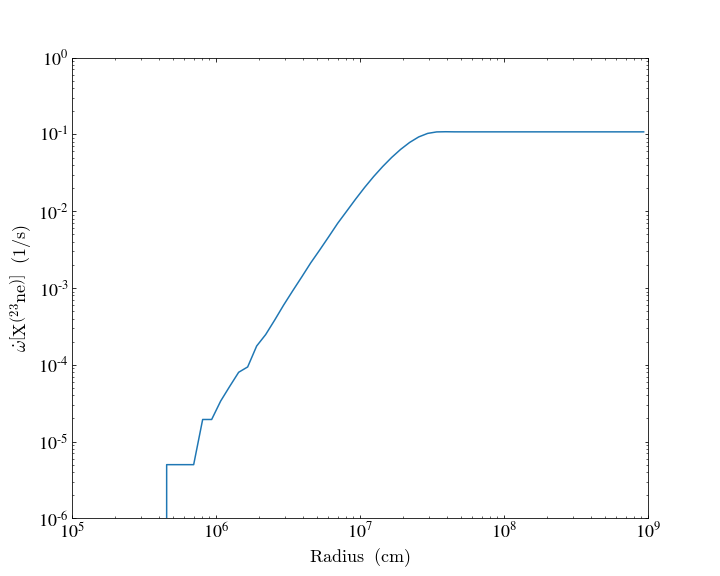

In [48]:
Image(filename='omegadotne23_profileplot.png')

In [45]:
ad = ds4.all_data()
profiles = yt.create_profile(ad, "radius", ["omegadot(na23)"], weight_field=None,    
                      accumulation=True )

plot = yt.ProfilePlot.from_profiles(profiles)
plot.set_xlim(1.0e5, 1.0e9)
plot.set_ylim('omegadot(na23)', 1.0e-6, 1.0e0)
plot.save("omegadotna23_profileplot.png")


yt : [INFO     ] 2018-06-19 17:40:09,595 Saving omegadotna23_profileplot.png
yt : [INFO     ] 2018-06-19 17:40:09,596 Saving plot omegadotna23_profileplot.png


['omegadotna23_profileplot.png']

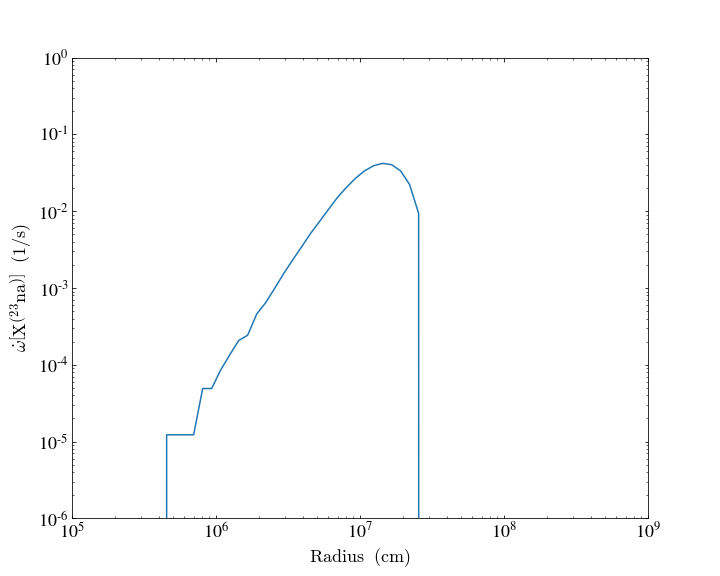

In [46]:
Image(filename='omegadotna23_profileplot.png')

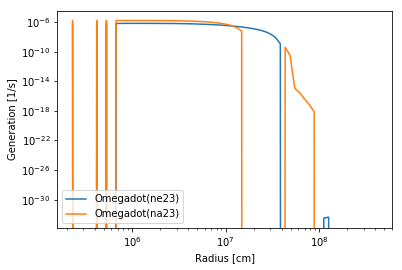

In [25]:
import yt
import matplotlib.pyplot as plt

profiles = []
labels= []

ad = ds4.all_data()

rp0 = yt.create_profile(ad, 'radius', 'omegadot(ne23)')
                         
                         
rp1 = yt.create_profile(ad, 'radius', 'omegadot(na23)')
                         
fig = plt.figure()
ax = fig.add_subplot(111)
                         
ax.plot(rp0.x.value, rp0["omegadot(ne23)"].in_units("1/s").value,
        rp1.x.value, rp1["omegadot(na23)"].in_units("1/s").value)
                         
#ax.set_xlim(0,0.5e8)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Radius [cm]")
ax.set_ylabel("Generation [1/s]")
ax.legend(["Omegadot(ne23)", "Omegadot(na23)"])

fig.savefig("f_ne23na23_lvl4.png")
 


                


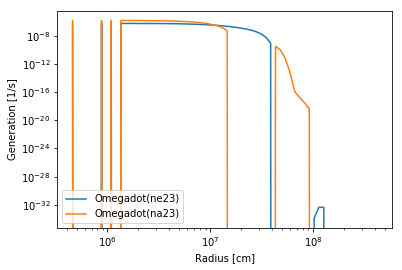

In [26]:
import yt
import matplotlib.pyplot as plt

profiles = []
labels= []

ad = ds3.all_data()

rp0 = yt.create_profile(ad, 'radius', 'omegadot(ne23)')
                         
                         
rp1 = yt.create_profile(ad, 'radius', 'omegadot(na23)')
                         
fig = plt.figure()
ax = fig.add_subplot(111)
                         
ax.plot(rp0.x.value, rp0["omegadot(ne23)"].in_units("1/s").value,
        rp1.x.value, rp1["omegadot(na23)"].in_units("1/s").value)
                         
#ax.set_xlim(0,0.5e8)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Radius [cm]")
ax.set_ylabel("Generation [1/s]")
ax.legend(["Omegadot(ne23)", "Omegadot(na23)"])

fig.savefig("f_ne23na23_lvl3.png")

yt : [INFO     ] 2018-06-21 09:42:16,974 xlim = 0.000000 512000000.000000
yt : [INFO     ] 2018-06-21 09:42:16,976 ylim = 0.000000 512000000.000000
yt : [INFO     ] 2018-06-21 09:42:16,978 xlim = 0.000000 512000000.000000
yt : [INFO     ] 2018-06-21 09:42:16,980 ylim = 0.000000 512000000.000000
yt : [INFO     ] 2018-06-21 09:42:16,982 Making a fixed resolution buffer of (('boxlib', 'enucdot')) 800 by 800
yt : [WARNING  ] 2018-06-21 09:42:17,186 Plot image for field ('boxlib', 'enucdot') has both positive and negative values. Min = -16702066692.000000, Max = 1394525414400.000000.
yt : [WARNING  ] 2018-06-21 09:42:17,187 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2018-06-21 09:42:17,302 Making a fixed resolution buffer of (('boxlib', 'enucdot')) 800 by 800
yt : [INFO     ] 2018-06-21 09:42:17,467 Saving plot f_enucdot_lvl3.png


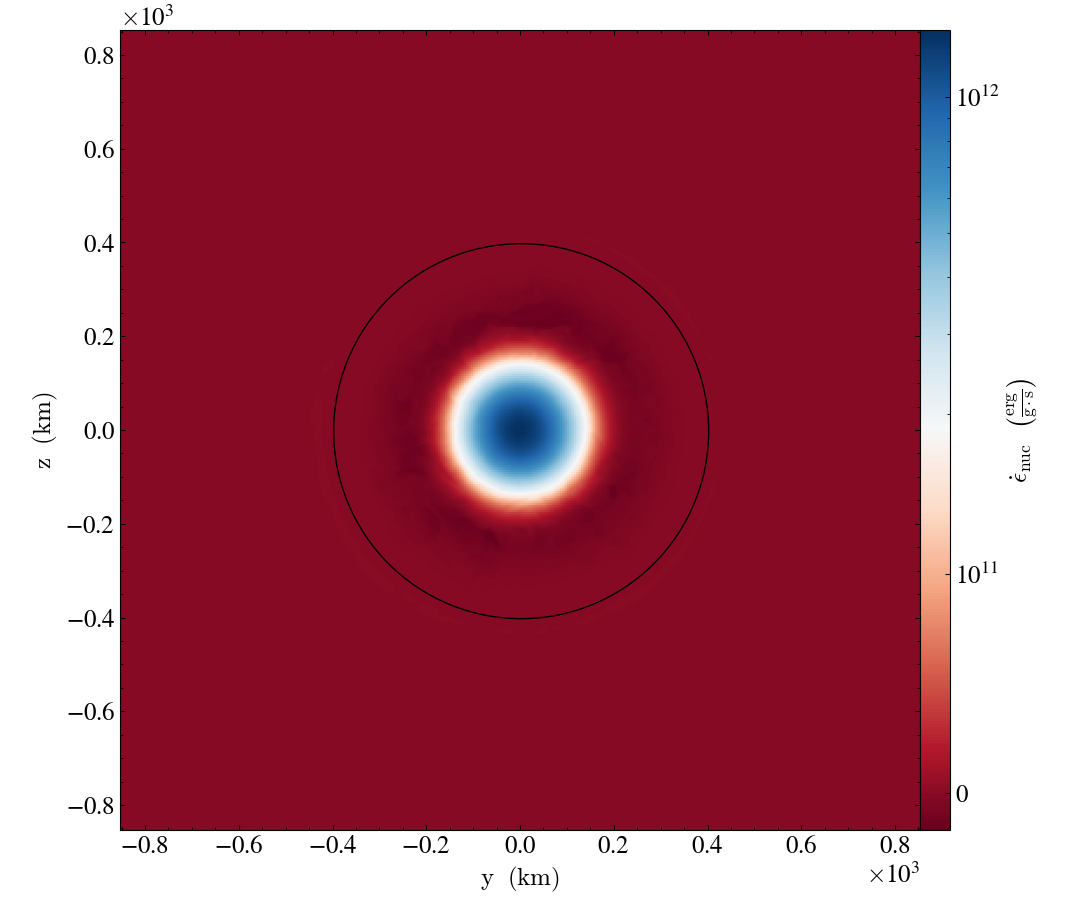

In [9]:
from yt.mods import SlicePlot
slc = SlicePlot(ds3,"x", "enucdot")
slc.set_cmap(field="enucdot", cmap='RdBu')
slc.annotate_sphere([2255750000, 256250000, 255750000], radius =(400, 'km'),
                    circle_args={'color':'black'} )
slc.zoom(3.0)
slc.save("f_enucdot_lvl3.png")
Image(filename='f_enucdot_lvl3.png')

yt : [INFO     ] 2018-06-21 09:40:55,857 xlim = 0.000000 512000000.000000
yt : [INFO     ] 2018-06-21 09:40:55,858 ylim = 0.000000 512000000.000000
yt : [INFO     ] 2018-06-21 09:40:55,859 xlim = 0.000000 512000000.000000
yt : [INFO     ] 2018-06-21 09:40:55,860 ylim = 0.000000 512000000.000000
yt : [INFO     ] 2018-06-21 09:40:55,862 Making a fixed resolution buffer of (('boxlib', 'enucdot')) 800 by 800
yt : [WARNING  ] 2018-06-21 09:40:56,120 Plot image for field ('boxlib', 'enucdot') has both positive and negative values. Min = -15454580918.000000, Max = 1412256952768.000000.
yt : [WARNING  ] 2018-06-21 09:40:56,121 Switching to symlog colorbar scaling unless linear scaling is specified later
yt : [INFO     ] 2018-06-21 09:40:56,259 Making a fixed resolution buffer of (('boxlib', 'enucdot')) 800 by 800
yt : [INFO     ] 2018-06-21 09:40:56,429 Saving plot f_enucdot_lvl4.png


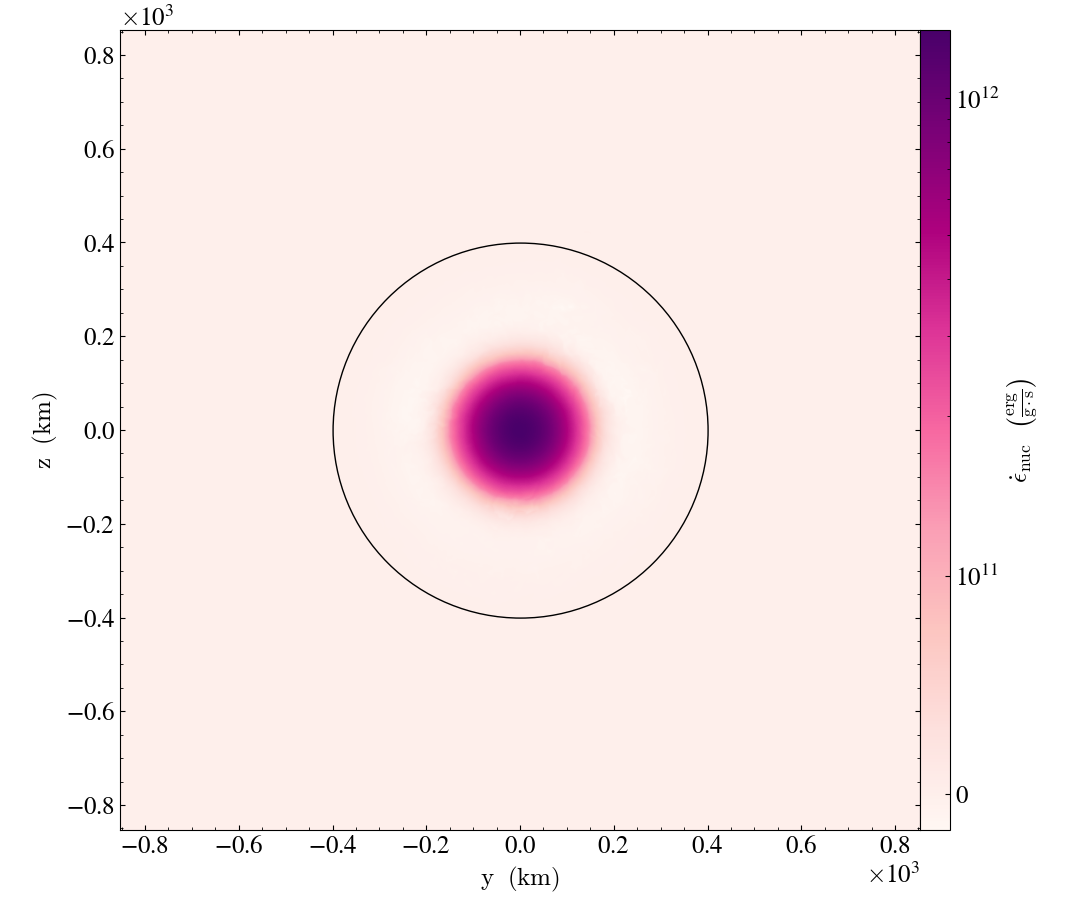

In [8]:
from yt.mods import SlicePlot
slc = SlicePlot(ds4,"x", "enucdot")
slc.set_cmap(field="enucdot", cmap='RdPu')
slc.annotate_sphere([255875000, 256125000, 255875000], radius =(400, 'km'),
                    circle_args={'color':'black'} )
slc.zoom(3.0)
slc.save("f_enucdot_lvl4.png")
Image(filename='f_enucdot_lvl4.png')

In [10]:
print(ds4.index.field_list)

[('boxlib', 'Machnumber'), ('boxlib', 'S'), ('boxlib', 'X(c12)'), ('boxlib', 'X(h1)'), ('boxlib', 'X(he4)'), ('boxlib', 'X(mg23)'), ('boxlib', 'X(n)'), ('boxlib', 'X(na23)'), ('boxlib', 'X(ne20)'), ('boxlib', 'X(ne23)'), ('boxlib', 'X(o16)'), ('boxlib', 'circum_velocity'), ('boxlib', 'deltagamma'), ('boxlib', 'density'), ('boxlib', 'divw0'), ('boxlib', 'entropy'), ('boxlib', 'entropypert'), ('boxlib', 'enucdot'), ('boxlib', 'h0'), ('boxlib', 'magvel'), ('boxlib', 'momentum'), ('boxlib', 'omegadot(c12)'), ('boxlib', 'omegadot(h1)'), ('boxlib', 'omegadot(he4)'), ('boxlib', 'omegadot(mg23)'), ('boxlib', 'omegadot(n)'), ('boxlib', 'omegadot(na23)'), ('boxlib', 'omegadot(ne20)'), ('boxlib', 'omegadot(ne23)'), ('boxlib', 'omegadot(o16)'), ('boxlib', 'p0'), ('boxlib', 'p0pluspi'), ('boxlib', 'pi'), ('boxlib', 'pioverp0'), ('boxlib', 'radial_velocity'), ('boxlib', 'rho0'), ('boxlib', 'rhoh0'), ('boxlib', 'rhopert'), ('boxlib', 'sponge'), ('boxlib', 'tfromp'), ('boxlib', 'tpert'), ('boxlib', 'v

In [16]:
@derived_field(name="enucdot_negative", units="erg/(g*s)", force_override=True)
def _enucdot_negative(field, data):
    return np.maximum(-data[('boxlib', 'enucdot')],
    yt.YTQuantity(0.0, 'erg/(g*s)'))

/home/cdegrendele/yt-conda/lib/python3.6/site-packages/yt/fields/local_fields.py:46: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  warnings.warn("Because 'sampling_type' not specified, yt will "


In [18]:
from yt.mods import SlicePlot

@derived_field(name="enucdot_negative", units="erg/(g*s)", force_override=True)
def _enucdot_negative(field, data):
    return np.maximum(-data[('boxlib', 'enucdot')],
    yt.YTQuantity(0.0, 'erg/(g*s)'))


slc = SlicePlot(ds4,"x", "enucdot_negative")
slc.set_cmap(field="enucdot", cmap='RdPu')
slc.annotate_sphere([255875000, 256125000, 255875000], radius =(400, 'km'),
                    circle_args={'color':'black'} )
slc.zoom(3.0)
slc.save("f_enucdot_n_lvl4.png")
Image(filename='f_enucdot_n_lvl4.png')

/home/cdegrendele/yt-conda/lib/python3.6/site-packages/yt/fields/local_fields.py:46: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  warnings.warn("Because 'sampling_type' not specified, yt will "


YTFieldNotFound: Could not find field '('io', 'enucdot_negative')' in wd_4lev_Tc5-5e8_rhoc4-5e9_plt06605.

In [28]:
sc = yt.create_scene(ds4, lens_type='perspective')

source = sc[0]

source.set_field('density')
source.set_log(True)

# Set up the camera parameters: focus, width, resolution, and image orientation
sc.camera.focus = ds4.domain_center
sc.camera.resolution = 1024
sc.camera.north_vector = [0, 0, 1]
sc.camera.position = [1.7, 1.7, 1.7]

# You may need to adjust the alpha values to get an image with good contrast.
# For the annotate_domain call, the fourth value in the color tuple is the
# alpha value.
sc.annotate_axes(alpha=.02)
sc.annotate_domain(ds4, color=[1, 1, 1, .01])

sc.scale()

text_string = "T = {} Gyr".format(float(ds4.current_time.to('Gyr')))

# save an annotated version of the volume rendering including a representation
# of the transfer function and a nice label showing the simulation time.
sc.save_annotated("vol_annotated.png", sigma_clip=6,
                  text_annotate=[[(.1, 0.95), text_string]])

yt : [INFO     ] 2018-06-22 12:08:44,280 Setting default field to ('gas', 'density')


AttributeError: 'Scene' object has no attribute 'scale'

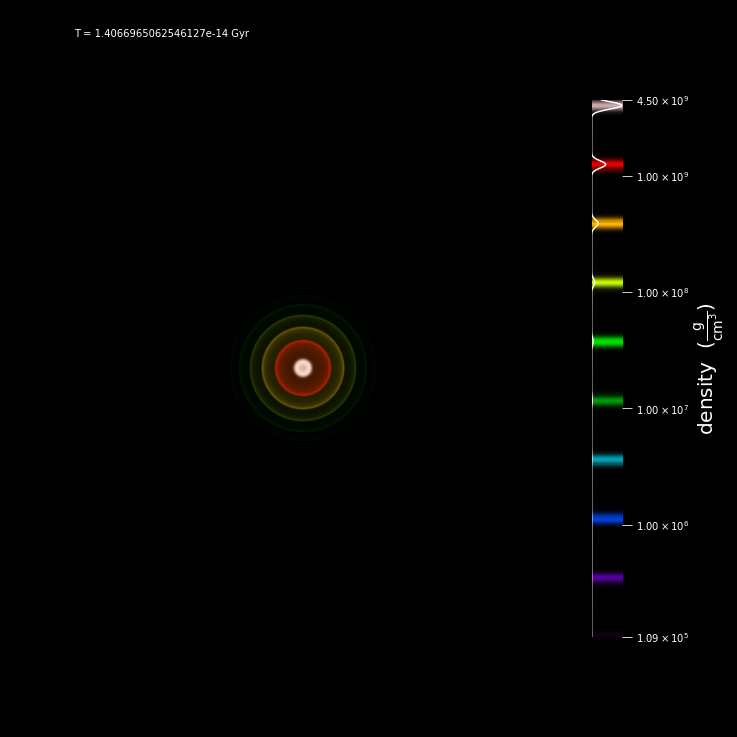

In [26]:
Image(filename="vol_annotated.png")